In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

sns.set(rc = {'figure.figsize': (12.0, 10.0)}, font_scale=1.65)

# improve rendering of plots on retina displays
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../datapackage/quiho/results.csv')

# Preprocessing

In [3]:
df.columns

Index(['giturl', 'commit', 'user', 'timestamp', 'benchmark', 'machine',
       'repetition', 'test', 'result'],
      dtype='object')

In [4]:
df.benchmark.unique()

array(['stressng', 'ssca', 'hpccg', 'scikit-learn', 'redisbench', 'comd',
       'lulesh', 'miniaero', 'miniamr', 'minife', 'fio', 'zlog', 'stream',
       'mysqlslap-mariadb-10.3.2', 'mysqlslap-mariadb-5.5.58', 'mysqlslap'], dtype=object)

In [5]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', nan, 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'ssca', 'hpccg', 'scikit-learn', 'SET', 'GET',
       'LPUSH', 'LPOP', 'comd', 'lulesh', 'miniaero', 'miniamr', 'minife',
       'randread-fiofile-128k-seq', 'randwrite-fiofile-128k-seq',
       'read-fiofile-128k-seq', 'rw-fiofile-128k-seq',
       'write-fiofile-128k-seq', 'randread-fiofile-4096k-seq',
       'randwrite-fiofile-4096k-seq', 'read-fiofile-4096k-seq',
       'rw-fiofile-4096k-seq', 'write-fiofile-4096k-seq',
       'randread-fiofile-4k-seq', 'randwrite-fiofile-4k-seq',
       'read-fiofile-4k-seq', 'rw-fiofile-4k-seq

In [6]:
df.machine.unique()

array(['c220g1.quiho.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho.schedock-PG0.apt.emulab.net',
       'c6320.quiho.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho.Schedock.emulab.net', 'd430.quiho.Schedock.emulab.net',
       'd530.quiho.Schedock.emulab.net', 'd710.quiho.Schedock.emulab.net',
       'd820.quiho.Schedock.emulab.net',
       'dl360.quiho.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-0',
       'm510.quiho.schedock-PG0.utah.cloudlab.us',
       'pc2400.quiho.emulab-net.uky.emulab.net',
       'pc3000.quiho.Schedock.emulab.net',
       'pc3300.quiho.emulab-net.uky.emulab.net',
       'pc3400.quiho.emulab-net.uky.emulab.net',
       'pc3500.quiho.emulab-net.uky.emulab.net',
       'r320.quiho.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu',
       'issdm-41', 'r720.quiho.schedock-PG0.apt.emulab.net',
       'c220g1.quiho-iv

In [7]:
df.sample(5).T

15100  \
giturl                    git@github.com:ivotron/quiho-popper   
commit                                                d46d579   
user                                                      ivo   
timestamp                                       1499030038000   
benchmark                                            stressng   
machine     c220g2.quiho-ivotron.schedock-PG0.wisc.cloudla...   
repetition                                                  3   
test                                                     rmap   
result                                                827.587   

                                                        11777  \
giturl                    git@github.com:ivotron/quiho-popper   
commit                                                d46d579   
user                                                      ivo   
timestamp                                       1498013938000   
benchmark                                            stressng   
machine     c8220.quiho-ivotron.schedock-PG0.clemson.cloud...   
repetition                                                  3   
test                                                   icache   
result                                                675.491   

                                              26732  \
giturl          git@github.com:ivotron/quiho-popper   
commit                                      d46d579   
user                                            ivo   
timestamp                             1499724178000   
benchmark                                    stream   
machine     pc3400.quiho2.emulab-net.uky.emulab.net   
repetition                                        4   
test                                       triad-18   
result                                        256.2   

                                             2208   \
giturl         git@github.com:ivotron/quiho-popper   
commit                                     d46d579   
user                                           ivo   
timestamp                               1512873230   
benchmark                                 stressng   
machine     pc3400.quiho.emulab-net.uky.emulab.net   
repetition                                       3   
test                                        malloc   
result                                 1.34361e+06   

                                                        15074  
giturl                    git@github.com:ivotron/quiho-popper  
commit                                                d46d579  
user                                                      ivo  
timestamp                                       1499030038000  
benchmark                                            stressng  
machine     c220g2.quiho-ivotron.schedock-PG0.wisc.cloudla...  
repetition                                                  3  
test                                                  bsearch  
result                                                380.675

In [8]:
# treat every repetition as a new data point
df['machine_id'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']) + '-' + str(x['timestamp']), axis=1) 

In [9]:
# the 'null' stressor is loaded as a null string, so let's fix it
df['test'] = df['test'].apply(lambda x: 'null' if pd.isnull(x) else x)

len(df)

27677

In [10]:
# better naming for redis tests
df['test'] = df.apply(lambda x: 'redis-' + x['test'].lower() if x['benchmark'] == 'redisbench' else x['test'], axis=1)

In [11]:
# rename mariadb tests
df['test'] = df.apply(lambda x: 'mariadb-{}-{}'.format(x['benchmark'].split('-')[2], x['test']) if 'mysqlslap-' in x['benchmark'] else x['test'], axis=1)

In [12]:
# what we use for feature vectors
df.query('benchmark == "stressng"')['test'].unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', 'null', 'numa', 'oom-pipe',
       'opcode', 'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv',
       'stack', 'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm',
       'vm-rw', 'vm-splice', 'zero'], dtype=object)

In [13]:
# what we can use to build models (apps whose performance we can learn)
df.query('benchmark != "stressng"')['test'].unique()

array(['ssca', 'hpccg', 'scikit-learn', 'redis-set', 'redis-get',
       'redis-lpush', 'redis-lpop', 'comd', 'lulesh', 'miniaero',
       'miniamr', 'minife', 'randread-fiofile-128k-seq',
       'randwrite-fiofile-128k-seq', 'read-fiofile-128k-seq',
       'rw-fiofile-128k-seq', 'write-fiofile-128k-seq',
       'randread-fiofile-4096k-seq', 'randwrite-fiofile-4096k-seq',
       'read-fiofile-4096k-seq', 'rw-fiofile-4096k-seq',
       'write-fiofile-4096k-seq', 'randread-fiofile-4k-seq',
       'randwrite-fiofile-4k-seq', 'read-fiofile-4k-seq',
       'rw-fiofile-4k-seq', 'write-fiofile-4k-seq', 'zlog', 'copy-1',
       'scale-1', 'add-1', 'triad-1', 'copy-10', 'scale-10', 'add-10',
       'triad-10', 'copy-12', 'scale-12', 'add-12', 'triad-12', 'copy-14',
       'scale-14', 'add-14', 'triad-14', 'copy-16', 'scale-16', 'add-16',
       'triad-16', 'copy-18', 'scale-18', 'add-18', 'triad-18', 'copy-2',
       'scale-2', 'add-2', 'triad-2', 'copy-20', 'scale-20', 'add-20',
       'triad-

# Visualize Variability

Let's visualize the variability across these two datasets (training vectors and learneable variable). We will first define a helper function for obtaining the transpose of the dataframe. This turns stressors and applications into columns.

In [16]:
# obtain a list with the name of all the stressors
stressors = list(df.query('benchmark == "stressng"')['test'].unique())

def get_features(in_df):
    # first we transpose (pivot) the matrix so features are columns 
    dff = in_df.pivot_table(index=["machine_id","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

    # then we flatten the index and rename the first column
    cols = dff.columns.get_level_values(1).values
    cols[0] = 'machine_id'
    dff.columns = cols

    # cleanup the remaining NaN, Inf values for stressors
    for s in stressors:
        dff = dff[dff[s].notnull()]
        
    return dff

Show executions of the data generation phase (every timestamp is a new execution)

In [17]:
df['timestamp'].unique()

array([   1512873230, 1497974400000, 1497506400000, 1498013938000,
       1499030038000, 1499724178000])

To ease the visualization of the variability, we'll select just one execution. We'll use the entire dataset later

In [18]:
subdf = df.query('timestamp == {}'.format(df['timestamp'].unique()[0]))

In [19]:
# all stressor columns should NOT be NaN. App result
# can be NaN since we don't run all the apps always,
# but we do run stressng always.
data = get_features(subdf)
data

machine_id        af-alg  \
0   c220g1.quiho.schedock-PG0.wisc.cloudlab.us-1-1...   7553.476964   
1   c220g1.quiho.schedock-PG0.wisc.cloudlab.us-2-1...   7781.799579   
2   c220g1.quiho.schedock-PG0.wisc.cloudlab.us-3-1...   7654.659131   
3   c220g2.quiho.schedock-PG0.wisc.cloudlab.us-1-1...   7576.272619   
4   c220g2.quiho.schedock-PG0.wisc.cloudlab.us-2-1...   7531.099951   
5   c220g2.quiho.schedock-PG0.wisc.cloudlab.us-3-1...   7835.013335   
6   c6220.quiho.schedock-PG0.apt.emulab.net-1-1512...  11119.491584   
7   c6220.quiho.schedock-PG0.apt.emulab.net-2-1512...  11023.967364   
8   c6220.quiho.schedock-PG0.apt.emulab.net-3-1512...  10939.796147   
9   c6320.quiho.schedock-PG0.clemson.cloudlab.us-1...   7734.249783   
10  c6320.quiho.schedock-PG0.clemson.cloudlab.us-2...   7677.878860   
11  c6320.quiho.schedock-PG0.clemson.cloudlab.us-3...   7816.039491   
12  c8220.quiho.schedock-PG0.clemson.cloudlab.us-1...   7212.599658   
13  c8220.quiho.schedock-PG0.clemson.cloudlab.us-2...   7516.427471   
14  c8220.quiho.schedock-PG0.clemson.cloudlab.us-3...   7774.496063   
15       d2100.quiho.Schedock.emulab.net-1-1512873230   7381.585386   
16       d2100.quiho.Schedock.emulab.net-2-1512873230   7506.134847   
17       d2100.quiho.Schedock.emulab.net-3-1512873230   7589.372066   
18        d430.quiho.Schedock.emulab.net-1-1512873230   7399.057338   
19        d430.quiho.Schedock.emulab.net-2-1512873230   7643.837775   
20        d430.quiho.Schedock.emulab.net-3-1512873230   7861.896836   
21        d530.quiho.Schedock.emulab.net-1-1512873230   7782.918328   
22        d530.quiho.Schedock.emulab.net-2-1512873230   7355.744544   
23        d530.quiho.Schedock.emulab.net-3-1512873230   7293.834449   
24        d710.quiho.Schedock.emulab.net-1-1512873230   7863.746451   
25        d710.quiho.Schedock.emulab.net-2-1512873230   7550.367401   
26        d710.quiho.Schedock.emulab.net-3-1512873230   7307.258156   
27        d820.quiho.Schedock.emulab.net-1-1512873230   7197.872078   
28        d820.quiho.Schedock.emulab.net-2-1512873230   7532.826933   
29        d820.quiho.Schedock.emulab.net-3-1512873230   7606.869705   
..                                                ...           ...   
31  dl360.quiho.emulab-net.utahddc.geniracks.net-2...   6848.125645   
32  dl360.quiho.emulab-net.utahddc.geniracks.net-3...   6870.935359   
33                    dwill.soe.ucsc.edu-1-1512873230  13277.918141   
34                               issdm-0-1-1512873230  18495.152124   
35                               issdm-0-2-1512873230  19591.584822   
36                               issdm-0-3-1512873230  19392.319707   
37  m510.quiho.schedock-PG0.utah.cloudlab.us-1-151...   7280.564573   
38  m510.quiho.schedock-PG0.utah.cloudlab.us-2-151...   7455.605777   
39  m510.quiho.schedock-PG0.utah.cloudlab.us-3-151...   7658.383164   
40  pc2400.quiho.emulab-net.uky.emulab.net-1-15128...   7453.746001   
41  pc2400.quiho.emulab-net.uky.emulab.net-2-15128...   7721.870847   
42  pc2400.quiho.emulab-net.uky.emulab.net-3-15128...   7852.532044   
43      pc3000.quiho.Schedock.emulab.net-1-1512873230   7182.893416   
44      pc3000.quiho.Schedock.emulab.net-2-1512873230   7632.876001   
45      pc3000.quiho.Schedock.emulab.net-3-1512873230   7497.866727   
46  pc3300.quiho.emulab-net.uky.emulab.net-1-15128...   9455.933942   
47  pc3300.quiho.emulab-net.uky.emulab.net-2-15128...   9438.741805   
48  pc3300.quiho.emulab-net.uky.emulab.net-3-15128...   9612.613752   
49  pc3400.quiho.emulab-net.uky.emulab.net-1-15128...   7586.687224   
50  pc3400.quiho.emulab-net.uky.emulab.net-2-15128...   7864.859804   
51  pc3400.quiho.emulab-net.uky.emulab.net-3-15128...   7816.513124   
52  pc3500.quiho.emulab-net.uky.emulab.net-1-15128...   7408.608811   
53  pc3500.quiho.emulab-net.uky.emulab.net-2-15128...   7799.959772   
54  pc3500.quiho.emulab-net.uky.emulab.net-3-15128...   7904.921441   
55  r320.quiho.schedock-PG0.apt.emulab.net-1-15128...  11101.938842

Now we'll look at the variability of stressors performance across machines



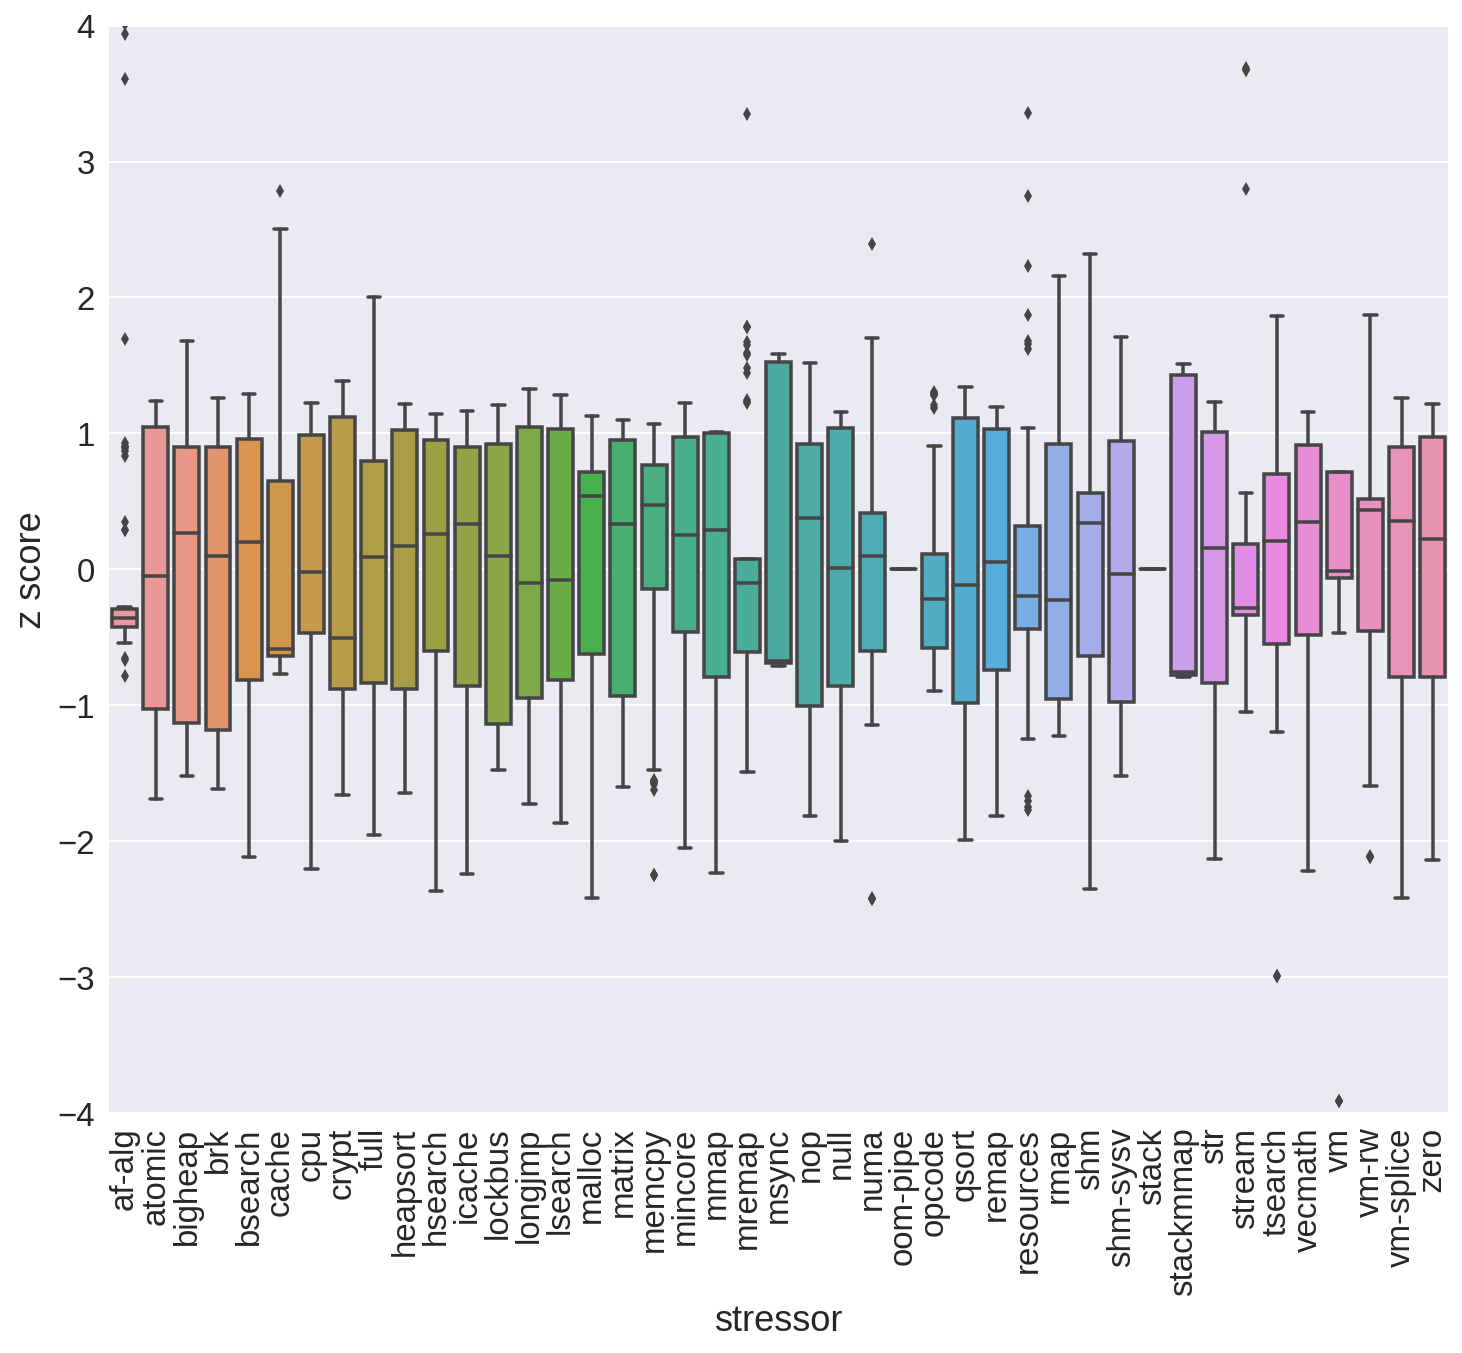

In [23]:
rs = np.random.RandomState(1)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data[stressors])

dff = pd.DataFrame(z_data, columns=stressors)

sns.boxplot(data=dff)
_ = plt.xticks(rotation=90)
plt.ylim(-4,4)
plt.ylabel('z score')
plt.xlabel('stressor')
plt.savefig('figures/stressng_variability.png', dpi=300, bbox_inches='tight')

We can also see the variability for some of the applications we are trying to learn

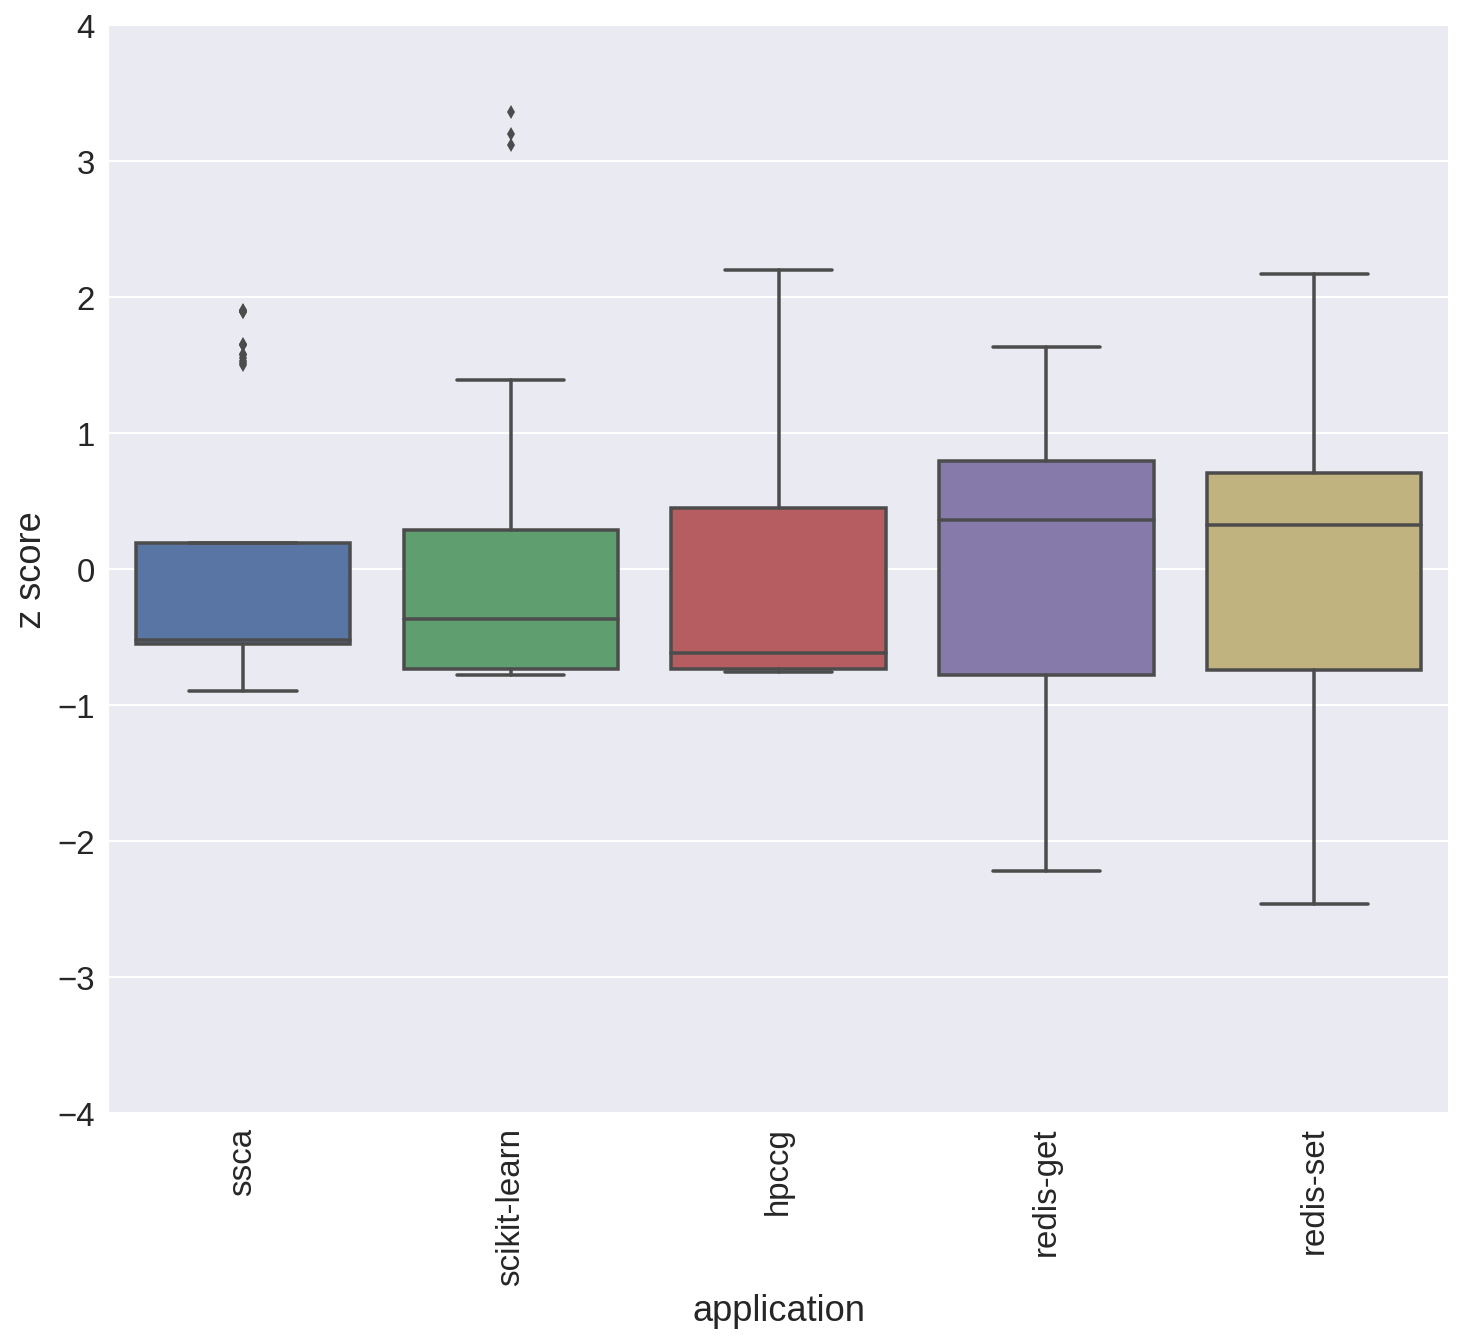

In [24]:
apps_subset = ['ssca', 'scikit-learn', 'hpccg', 'redis-get', 'redis-set']

rs = np.random.RandomState(1)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data[apps_subset].dropna())

dff = pd.DataFrame(z_data, columns=apps_subset)

sns.boxplot(data=dff)
_ = plt.xticks(rotation=90)
plt.ylim(-4,4)
plt.ylabel('z score')
plt.xlabel('application')
plt.savefig('figures/apps_variability.png', dpi=300, bbox_inches='tight')

In [25]:
# let's define a function to obtain and plot pearson correlation coefficients
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

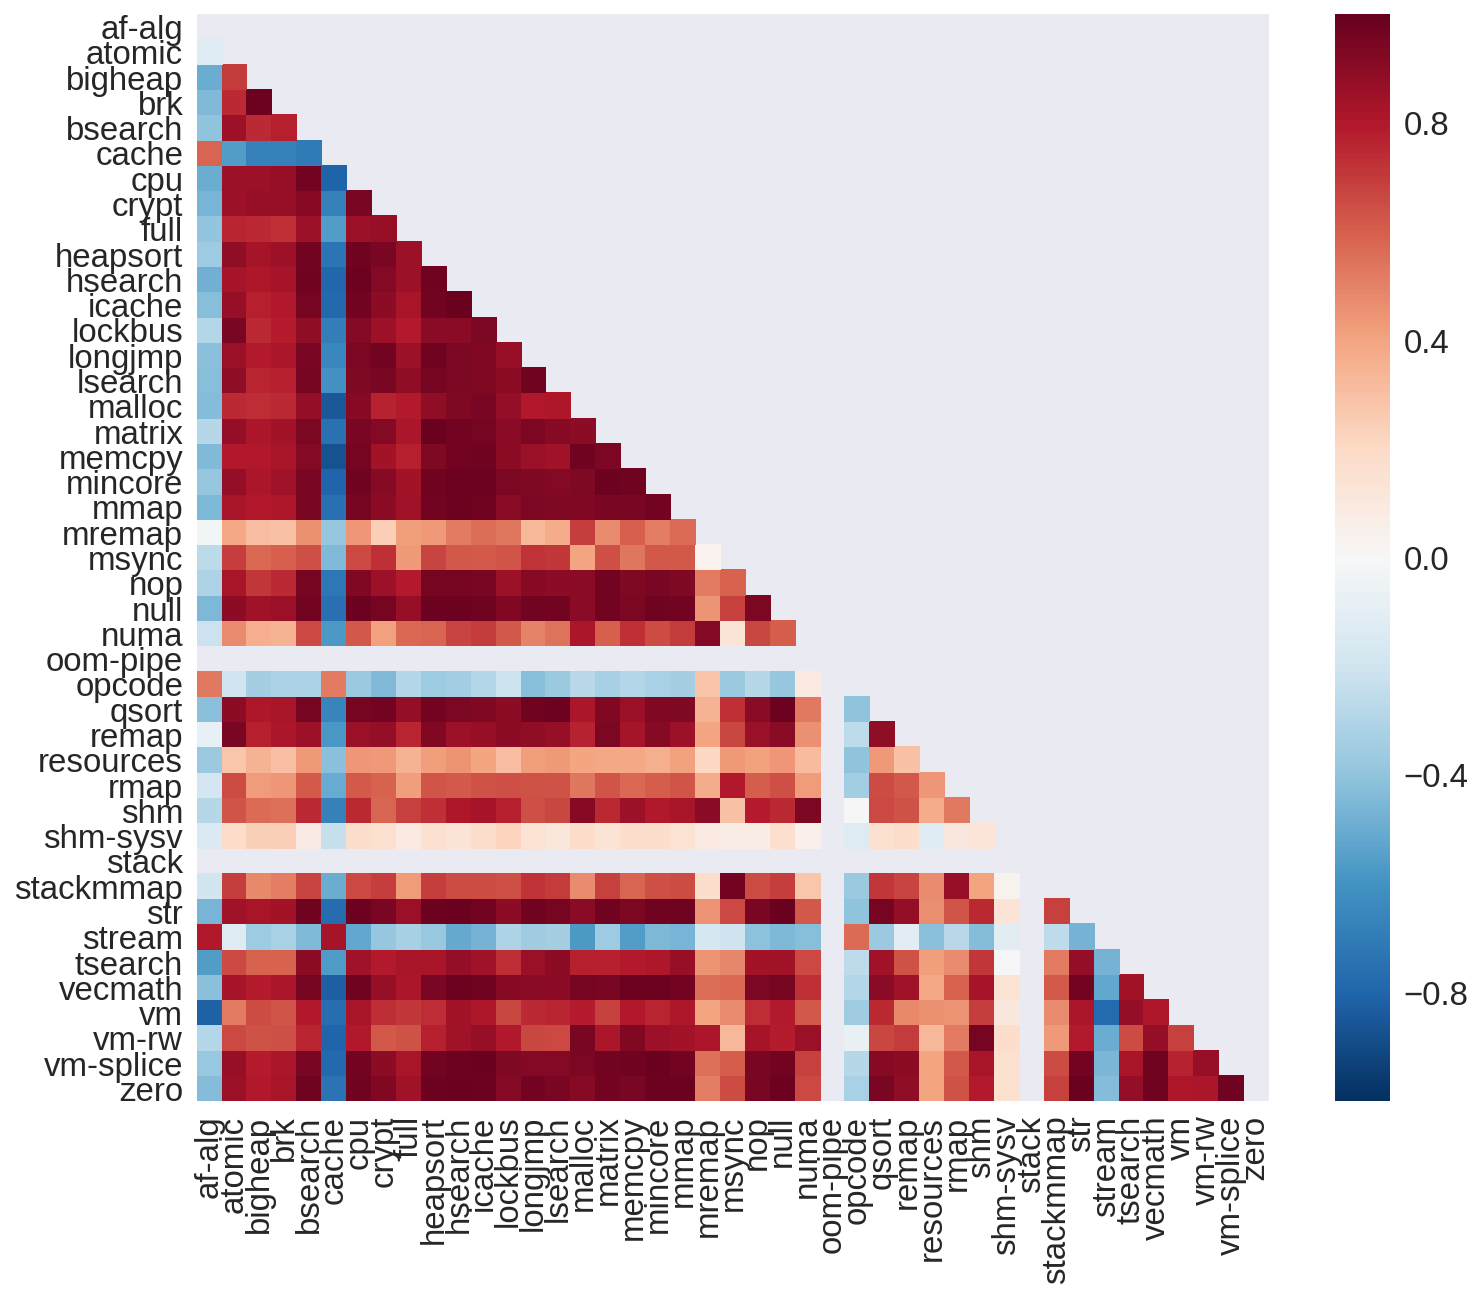

In [26]:
# plot heat map of correlation coefficients
corr_matrix = plot_corrmatrix(data[stressors])
plt.savefig('figures/corrmatrix.png', dpi=300, bbox_inches='tight')

# FGRUPs

Now we will rank features as a way of identifying fine granularity resource utilization. This is done on a per-application basis. We first define the function that plots importance

In [27]:
# gradient boosting regression
# taken from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# extended to use normalized data

rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def plot_importance(data, feats, apps, file_suffix=''):
    for b in apps:
        # ignore NaN values for app in question
        dff = data[data[b].notnull()]
        
        # normalize data
        z_data = z_scaler.fit_transform(dff[feats])
        
        # fit using random forest regressor
        params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
                  'learning_rate': 0.01, 'loss': 'ls'}
        regr = GradientBoostingRegressor(**params)
        regr.fit(z_data, dff[b])

        # Plot feature importance
        feature_importance = regr.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feats)[sorted_idx])
        plt.xlabel('Relative Importance')
        plt.title(b)
        plt.savefig('figures/{}{}.png'.format(b, file_suffix), dpi=300, bbox_inches='tight')
        plt.show()
        plt.clf()

And plot the feature importance for other apps

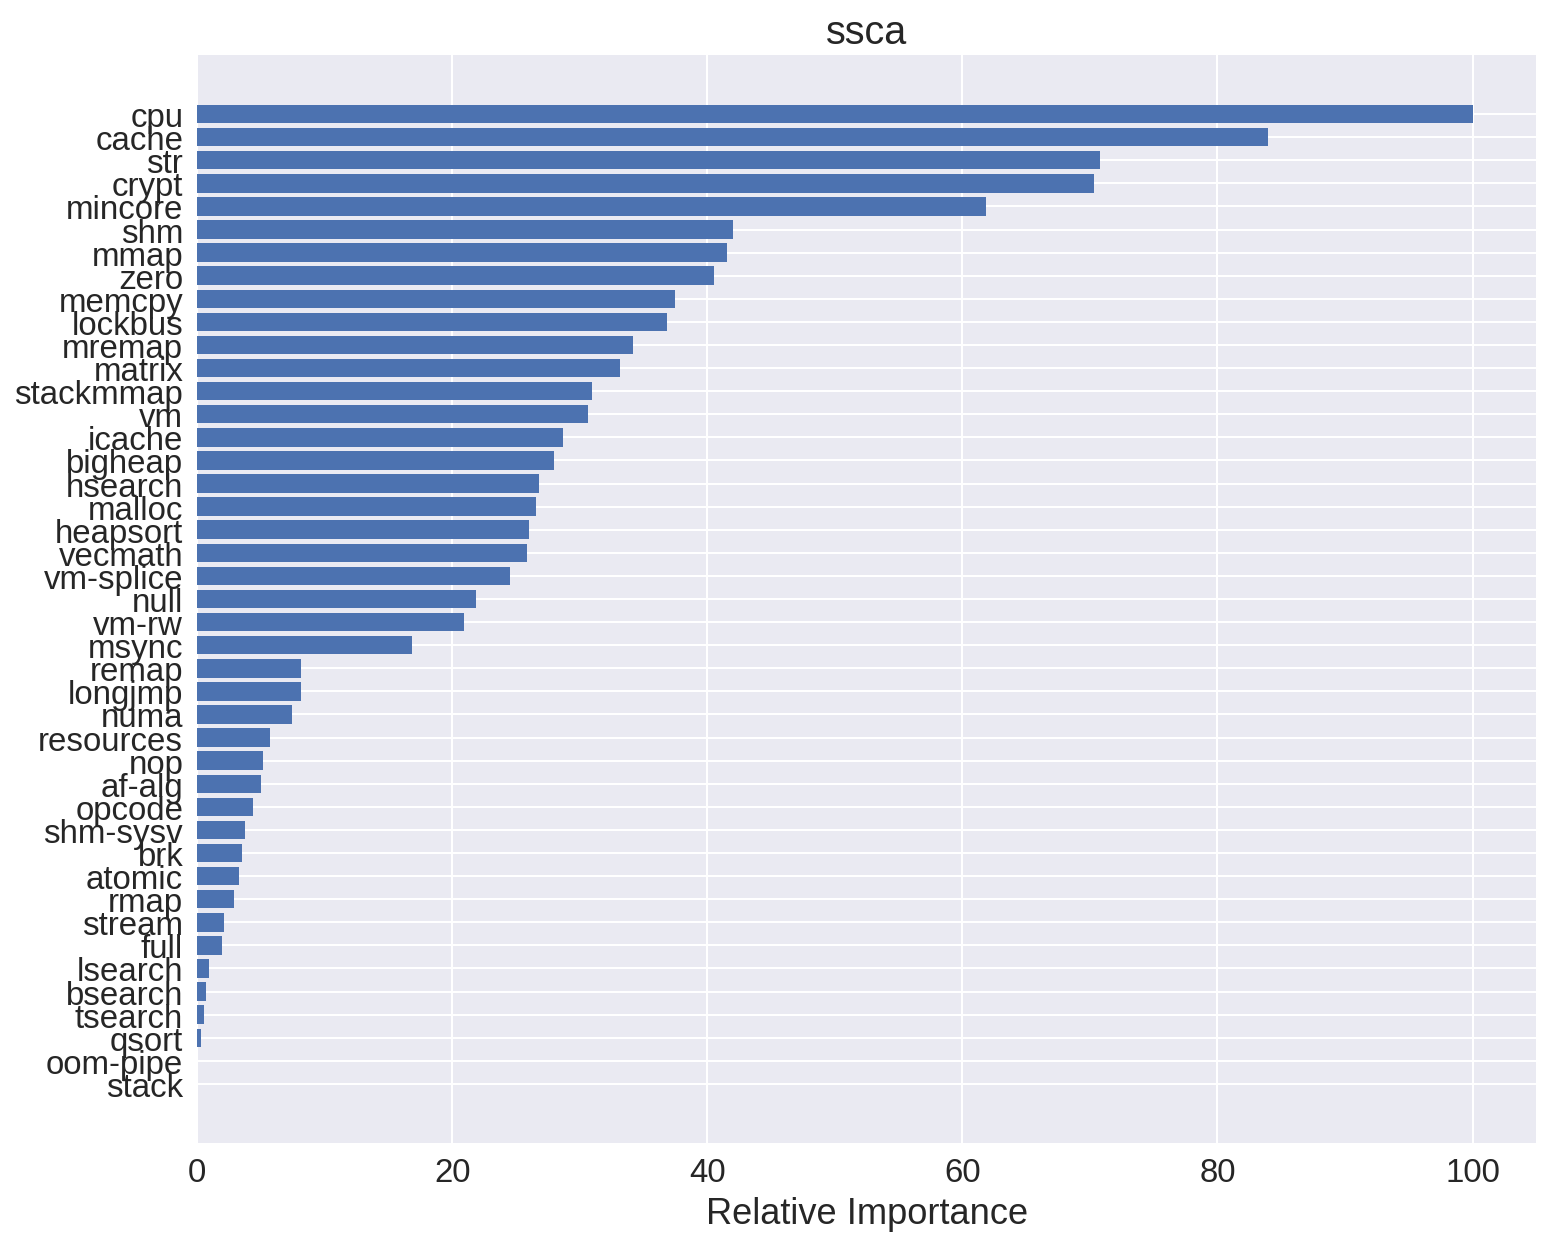

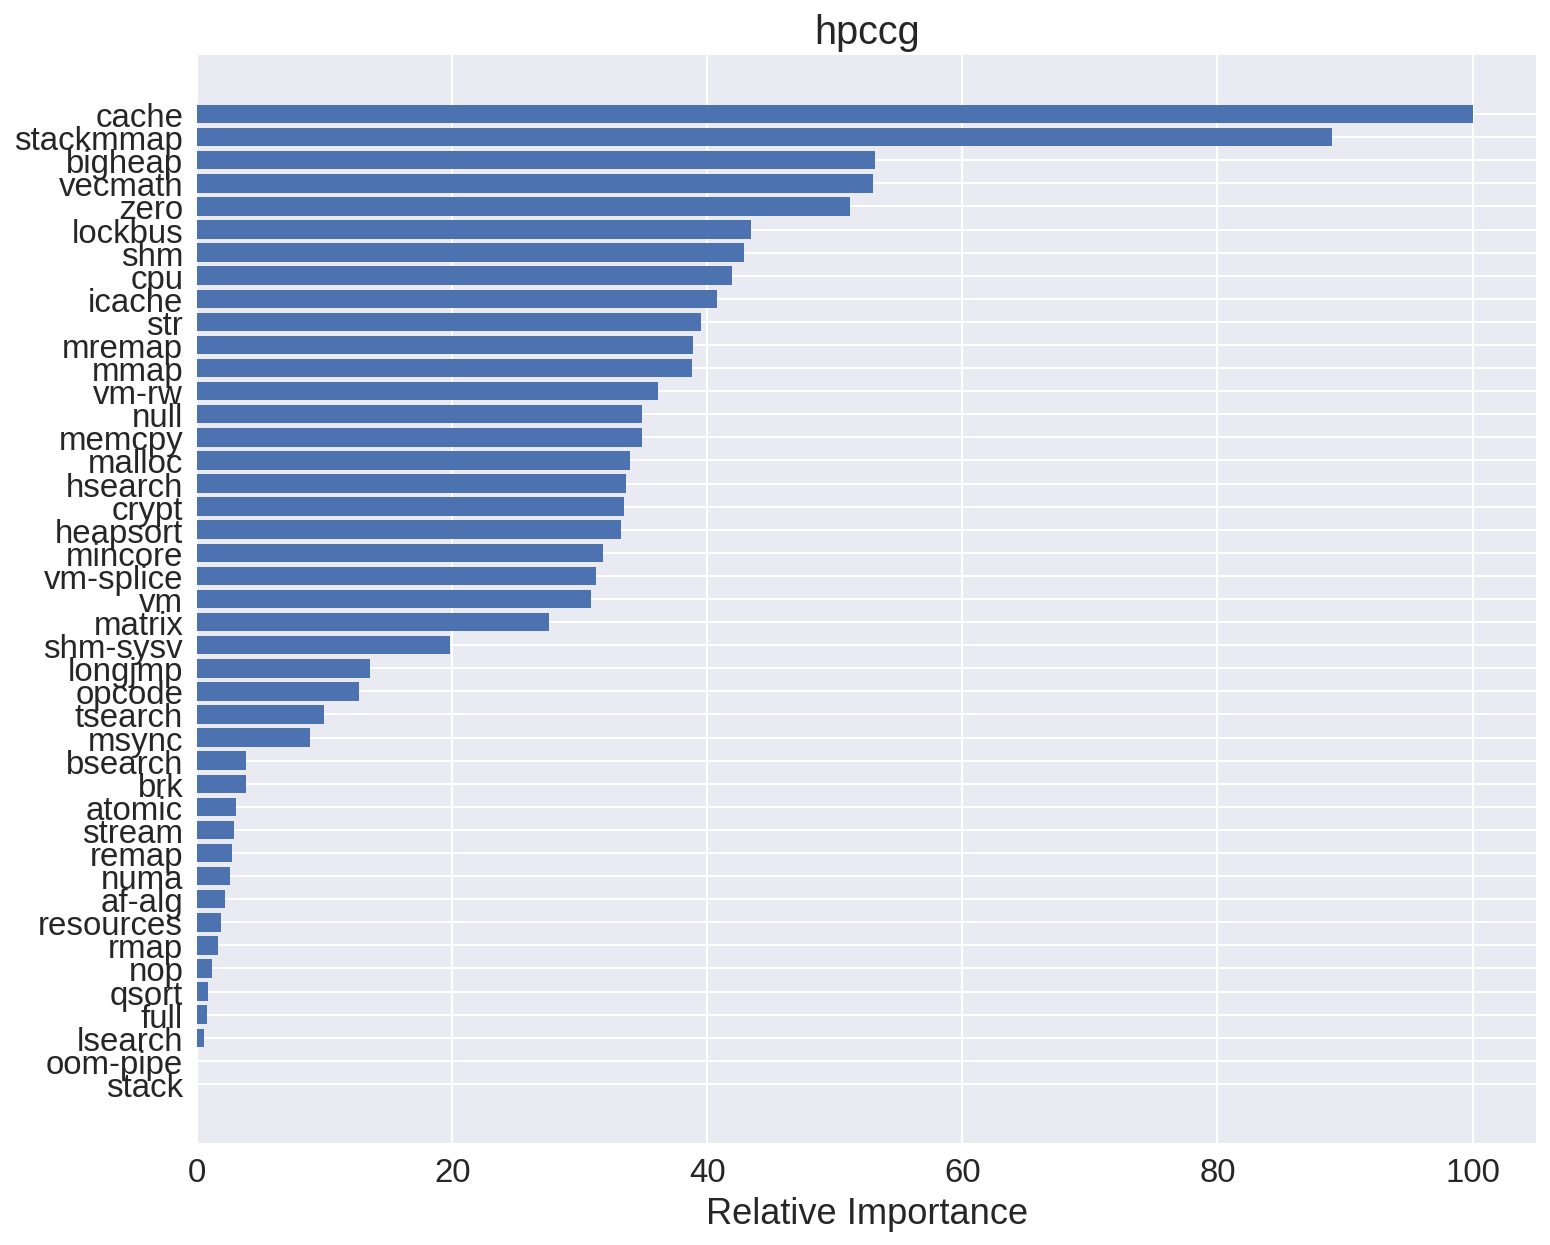

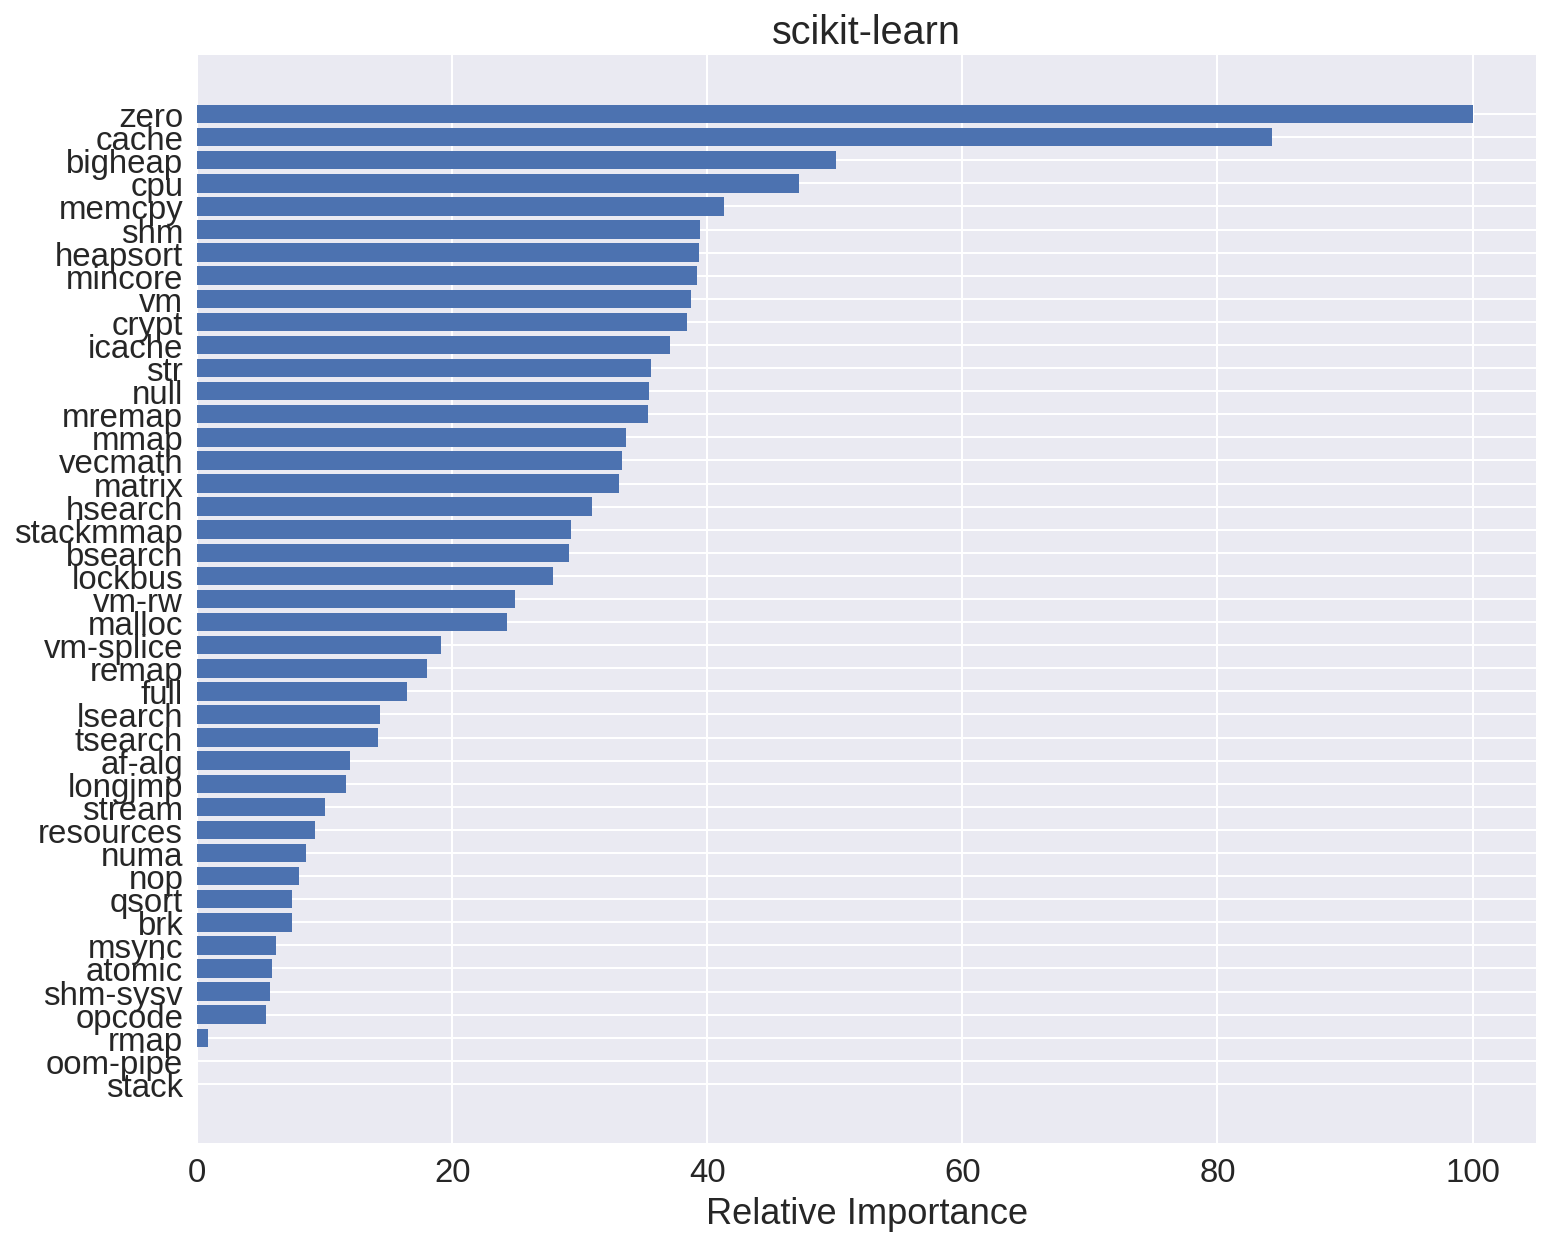

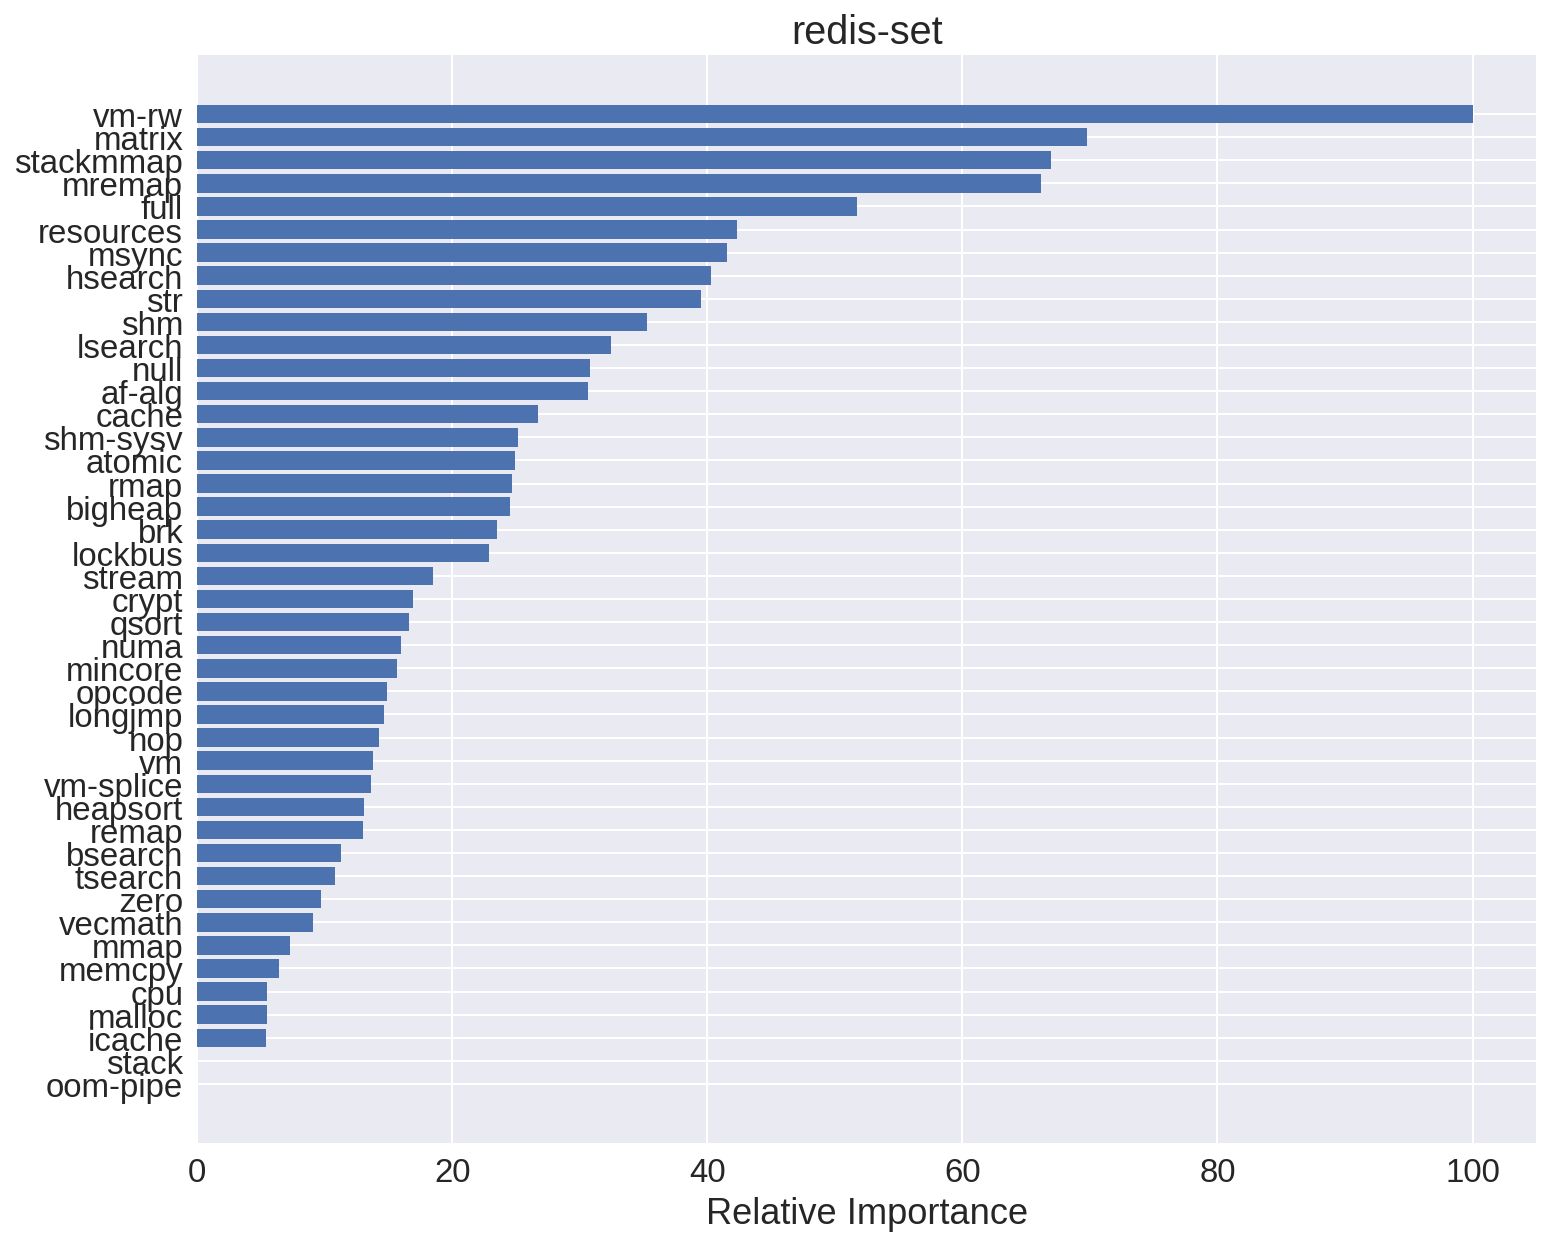

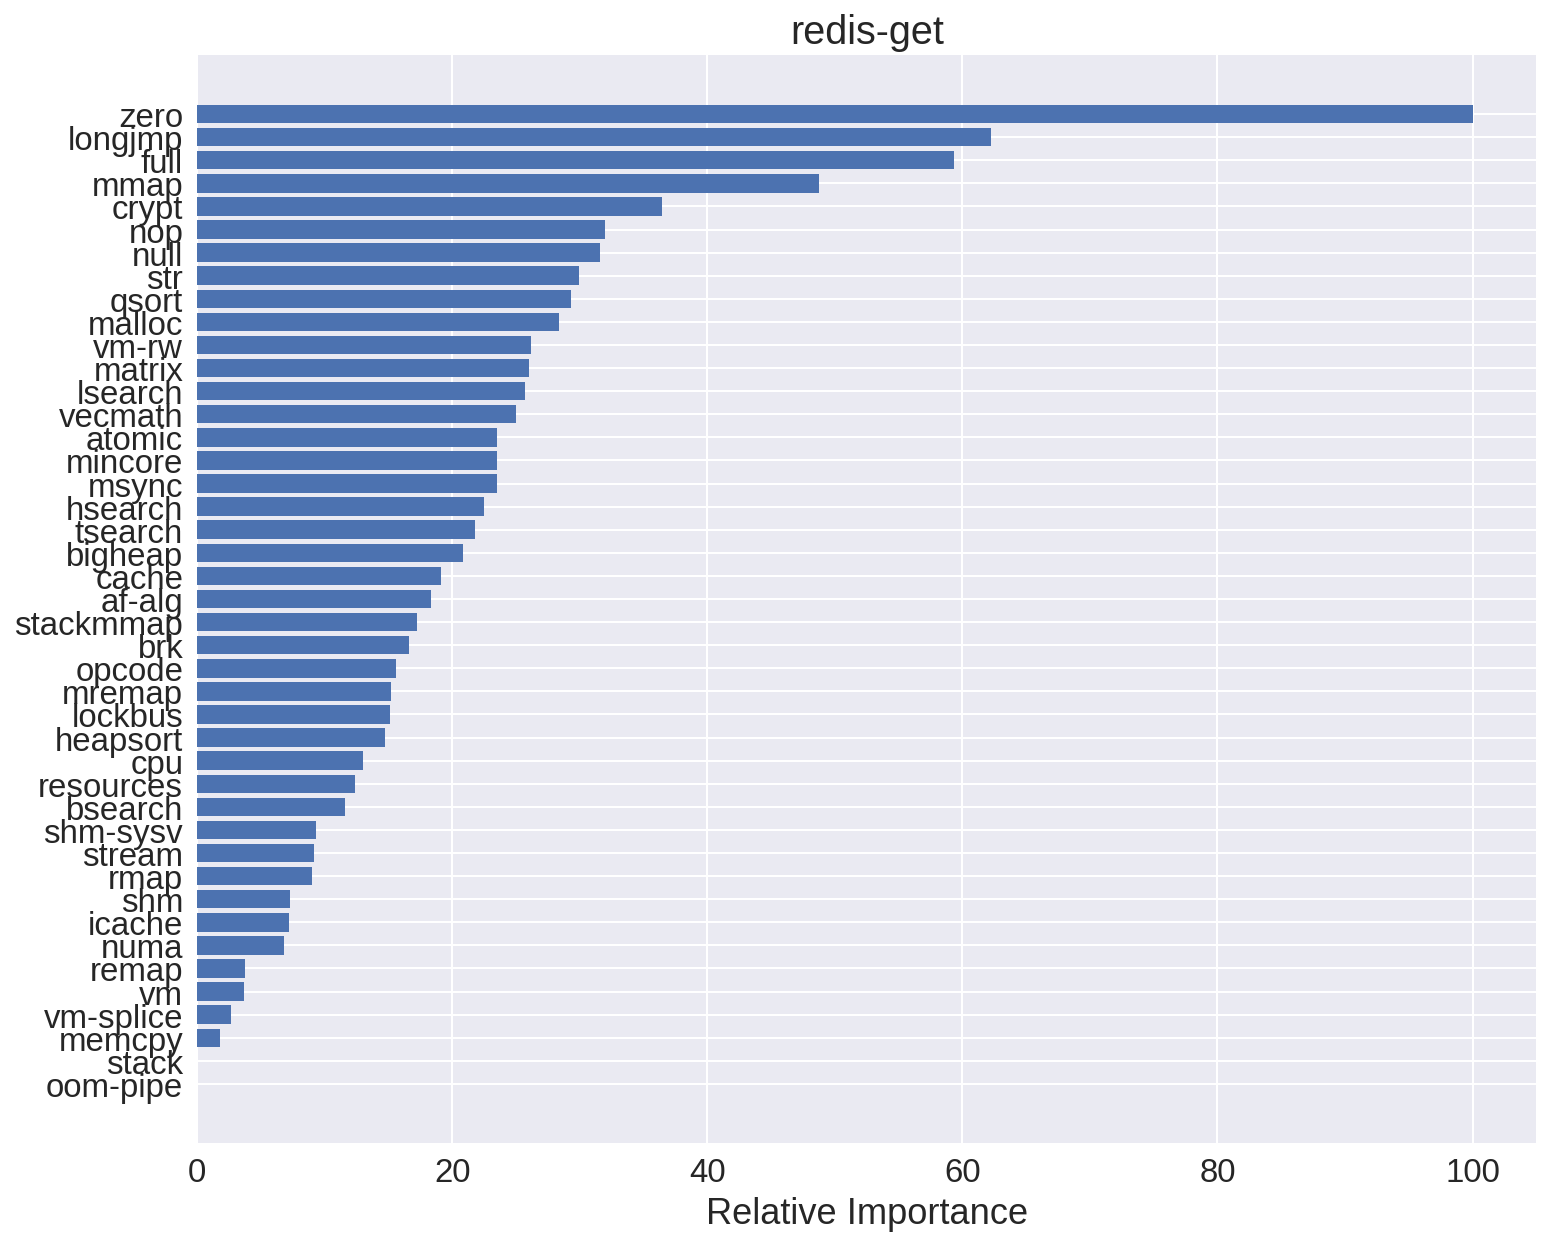

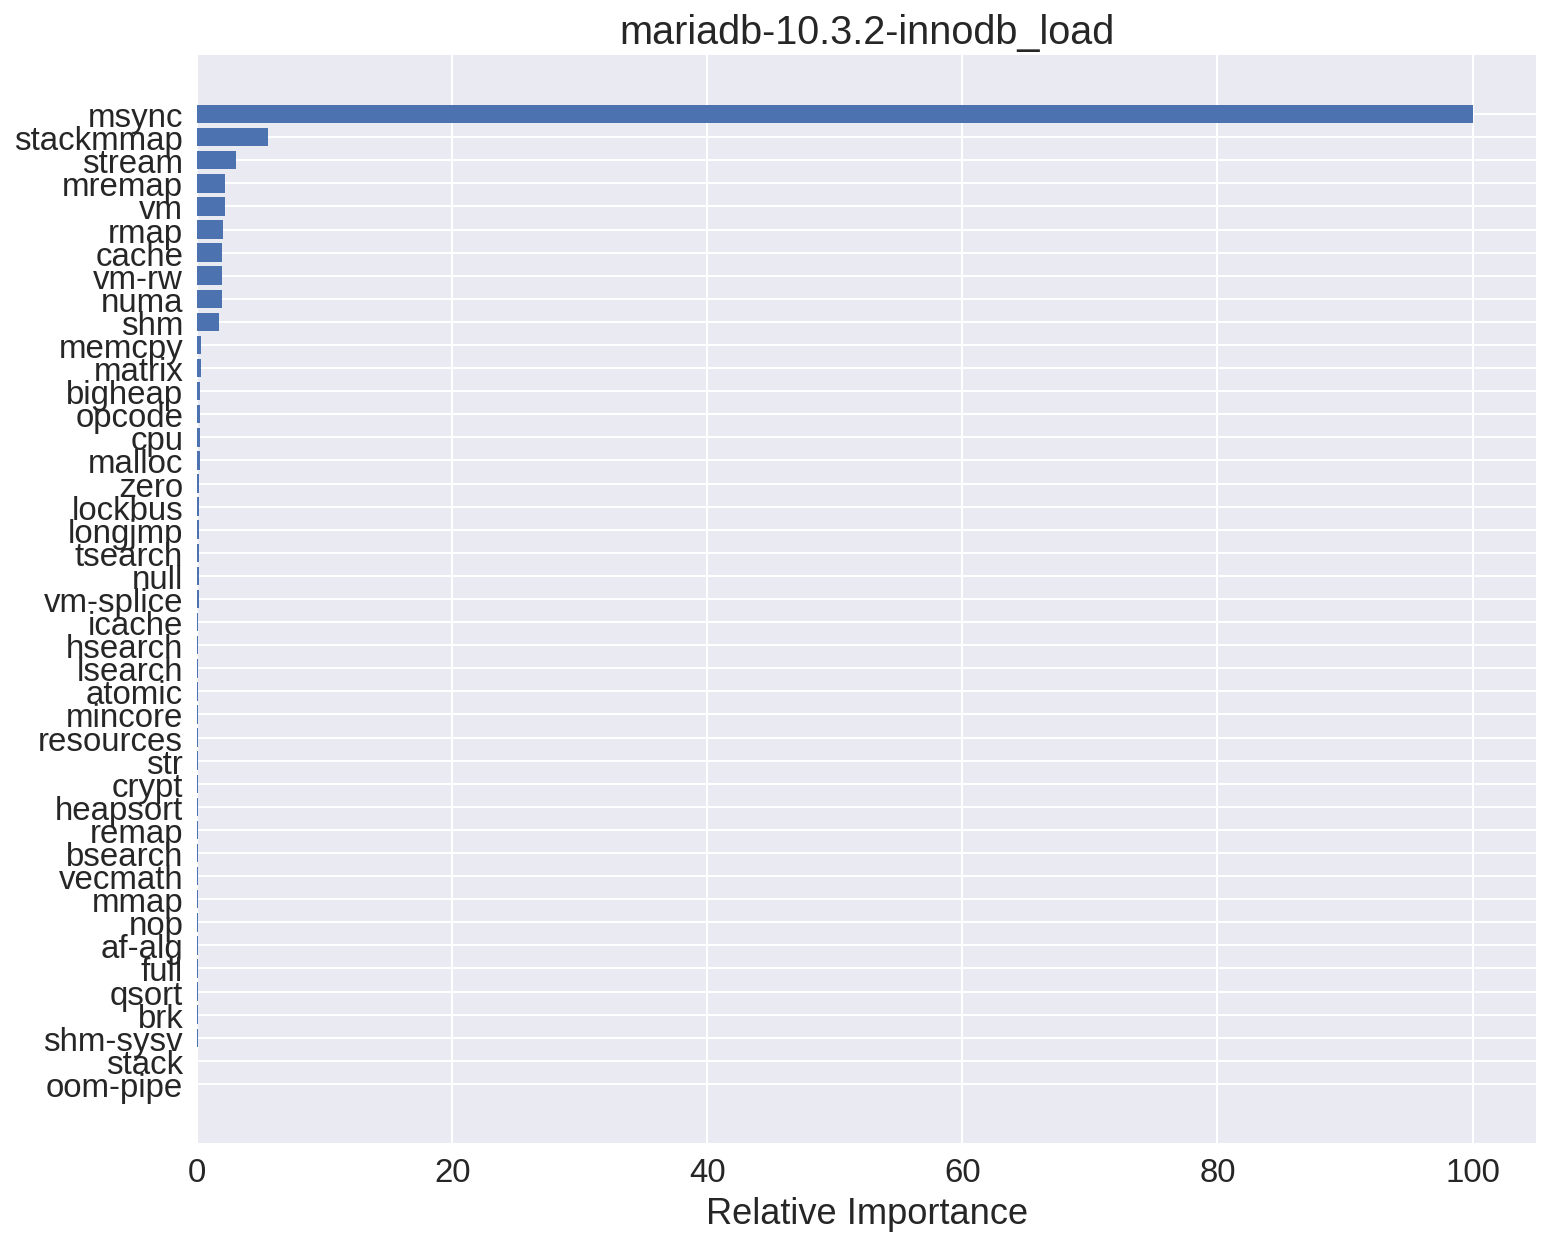

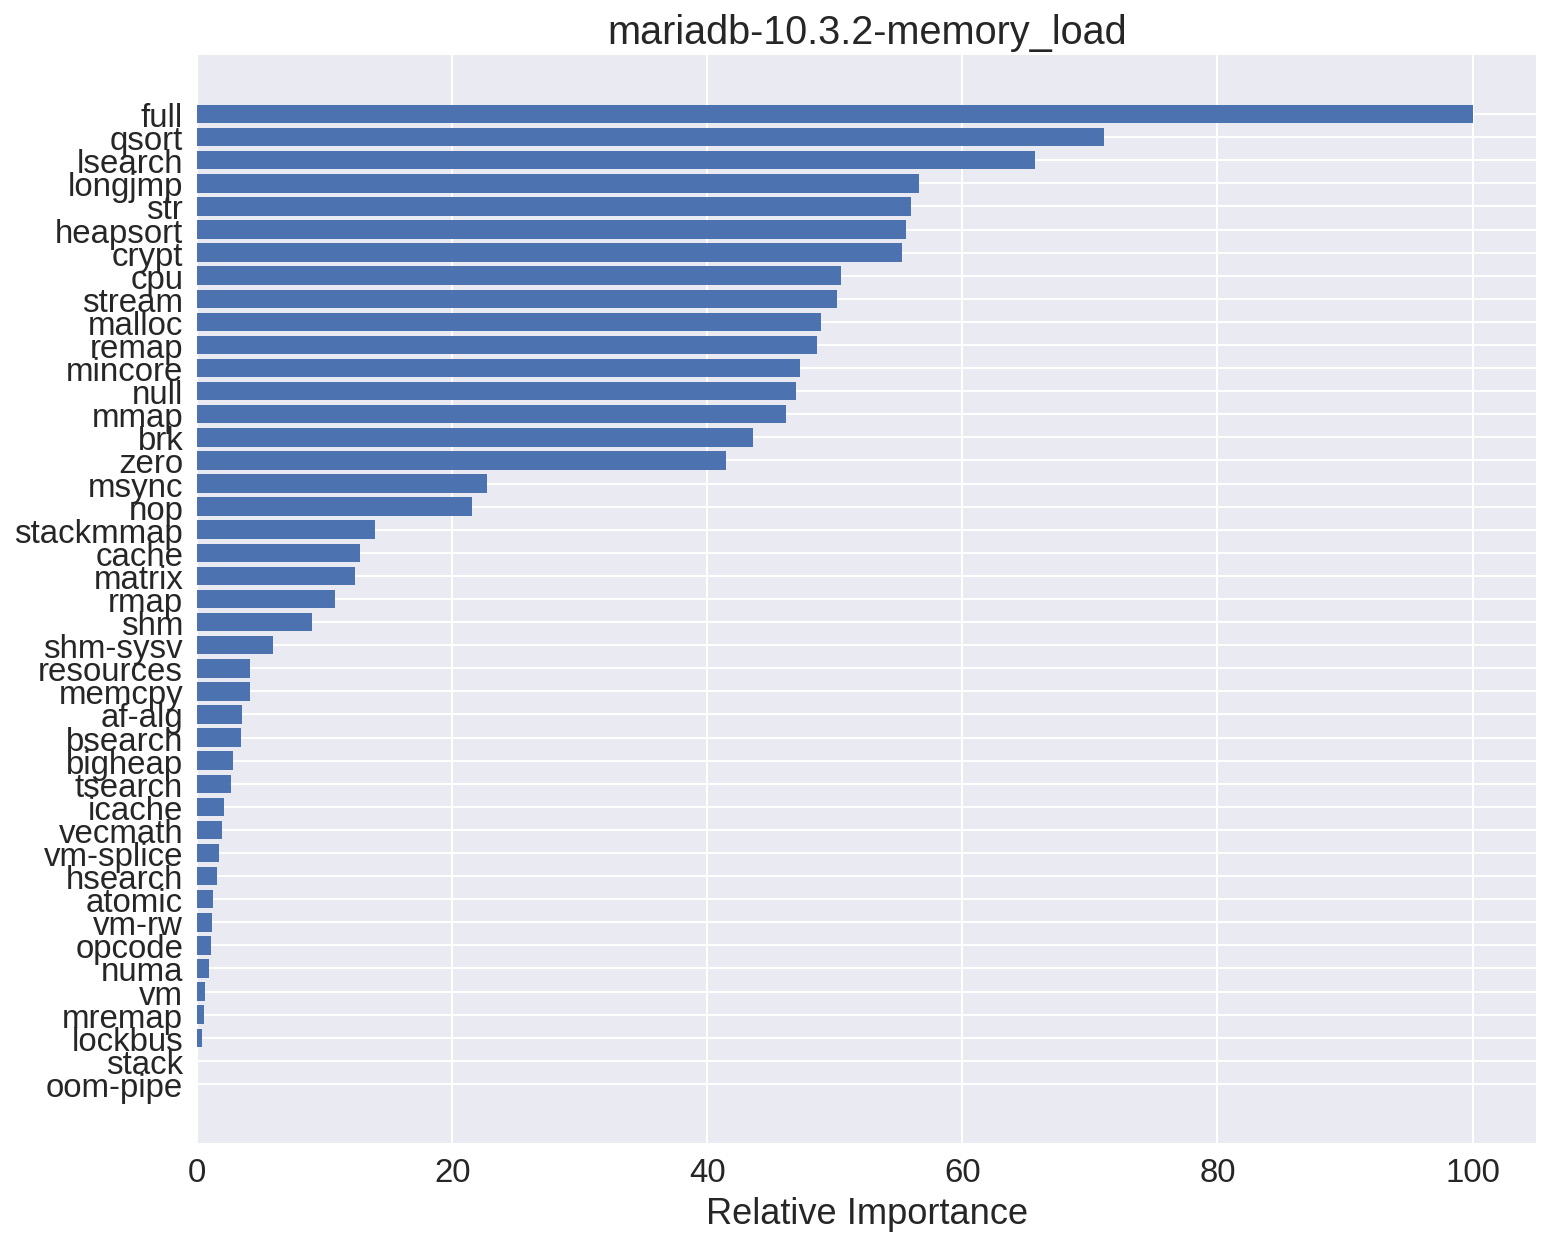

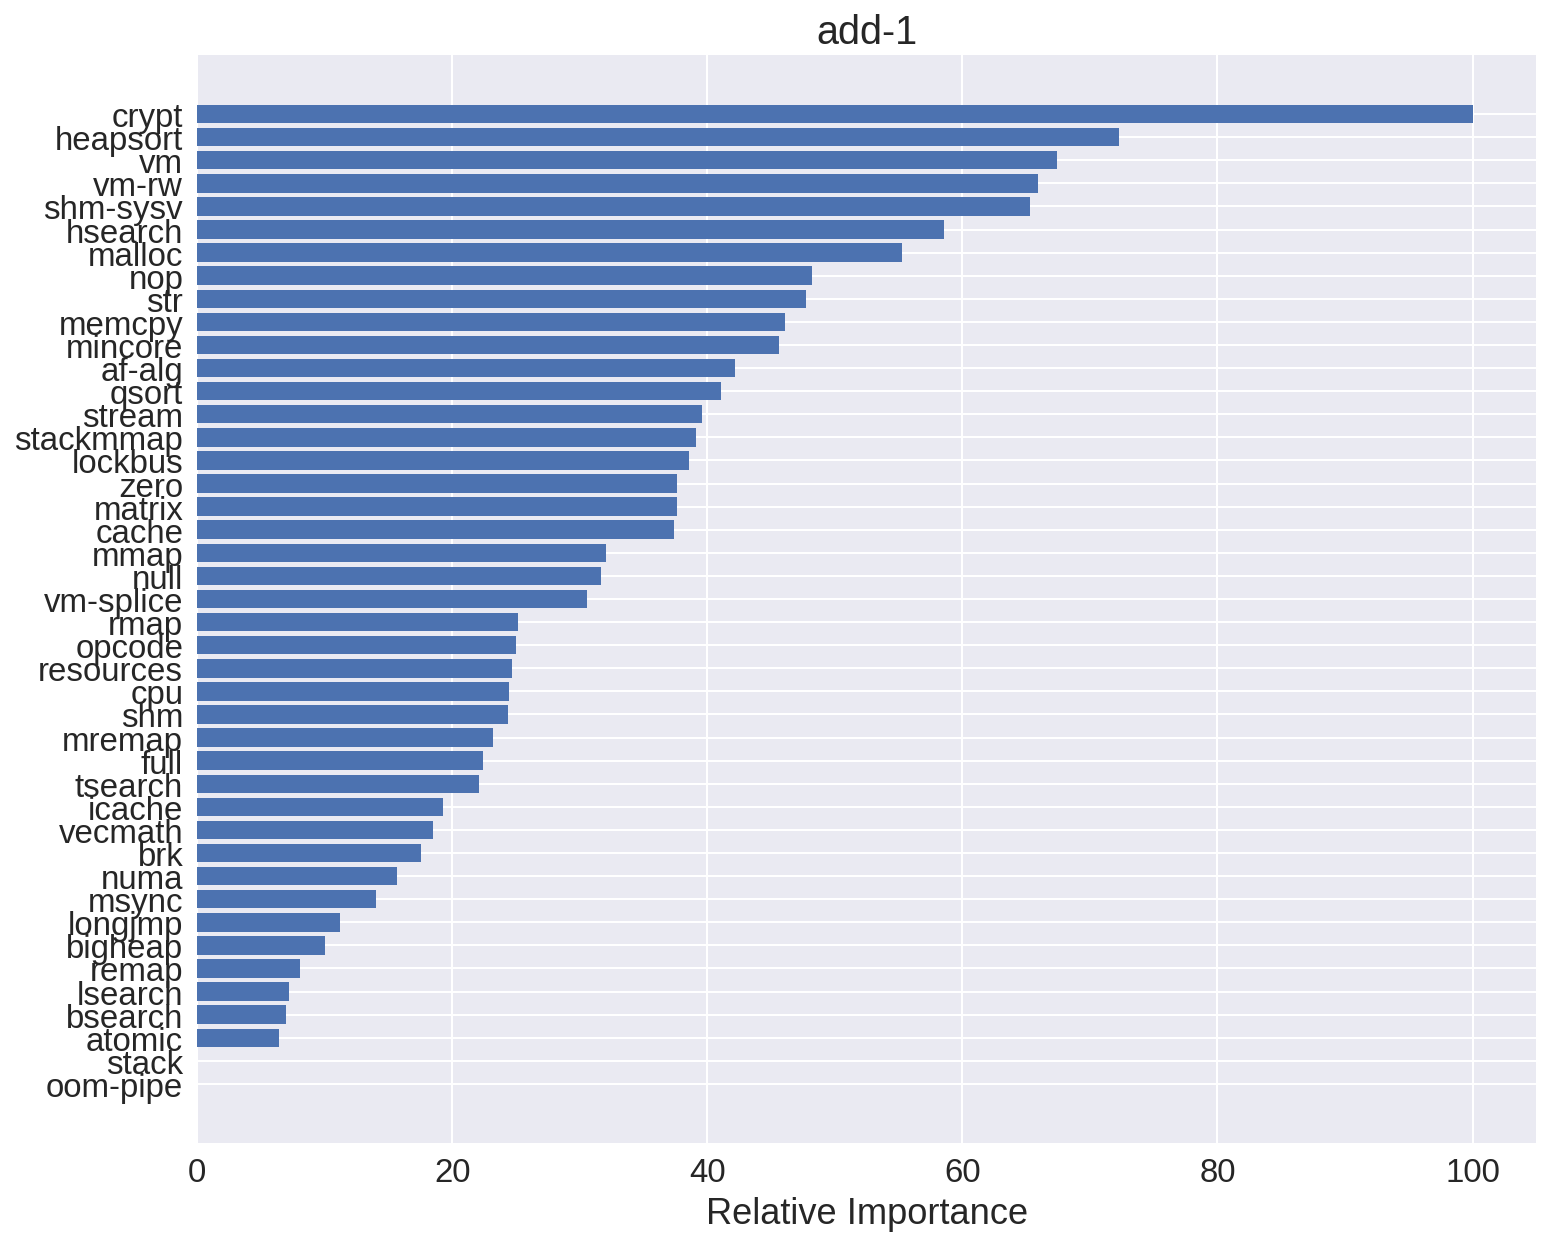

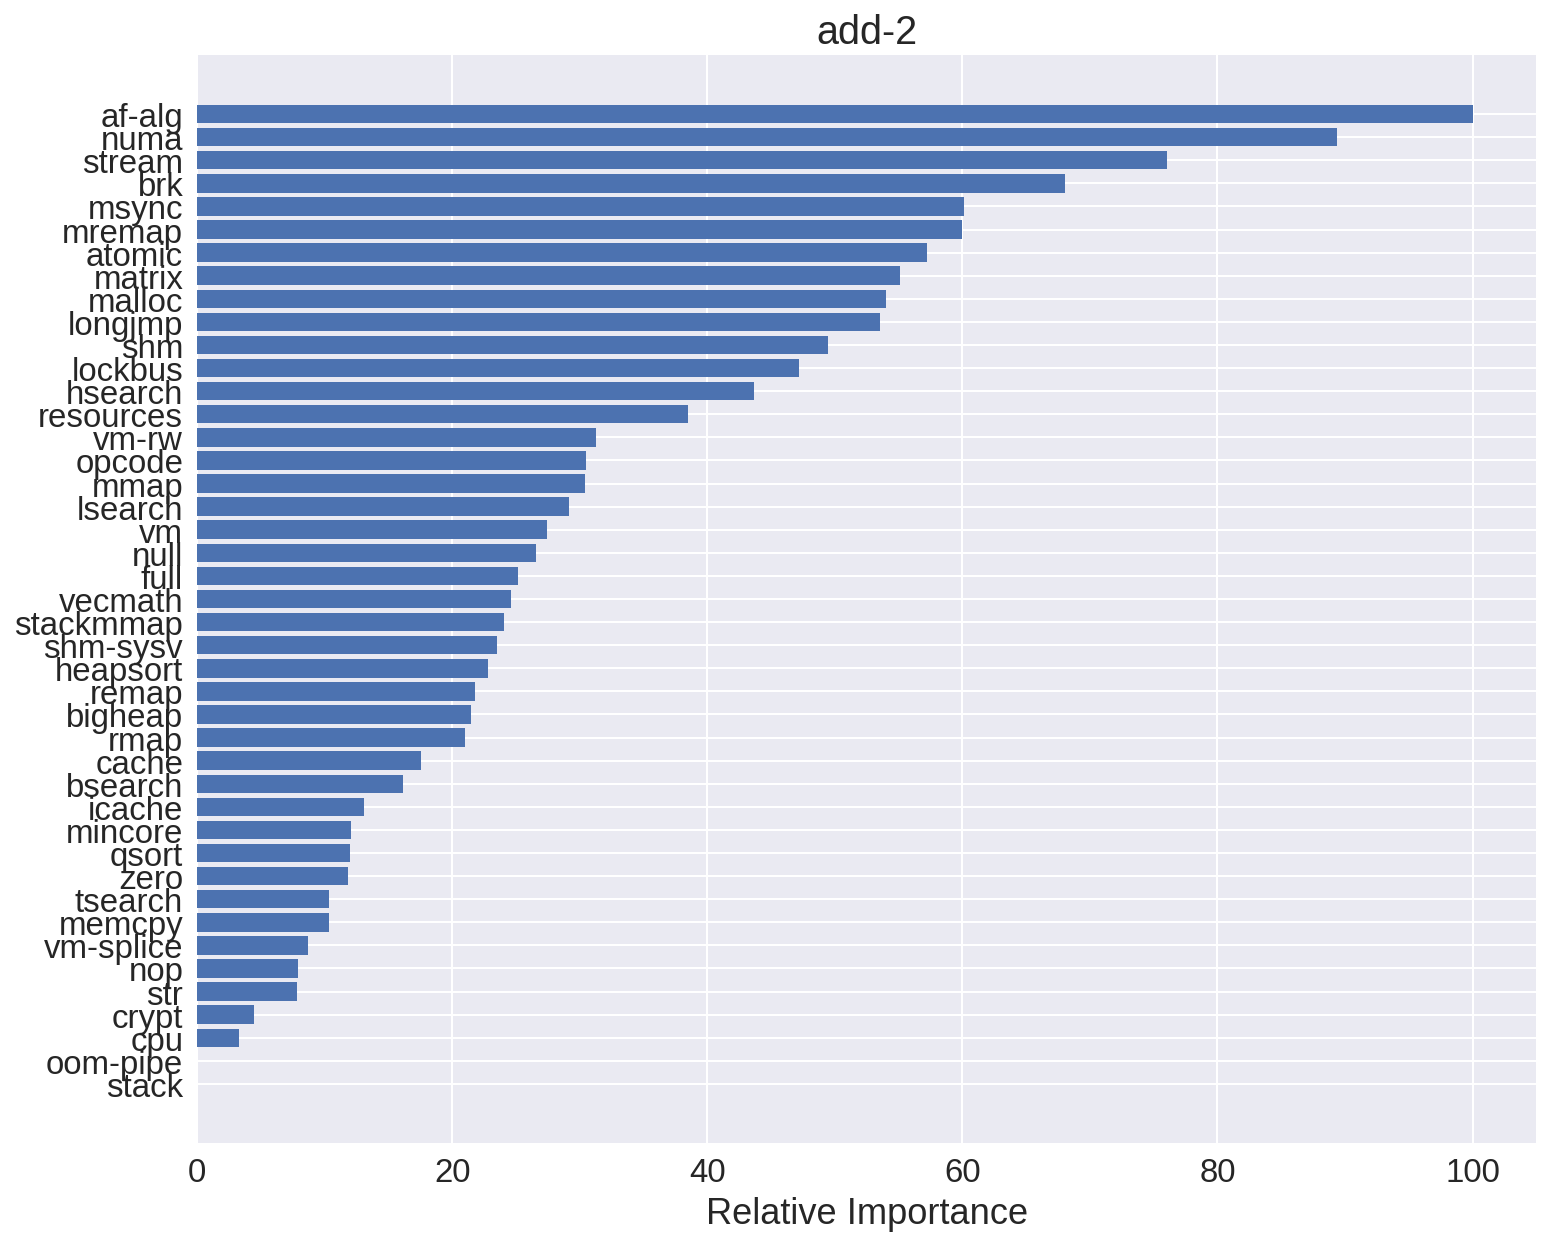

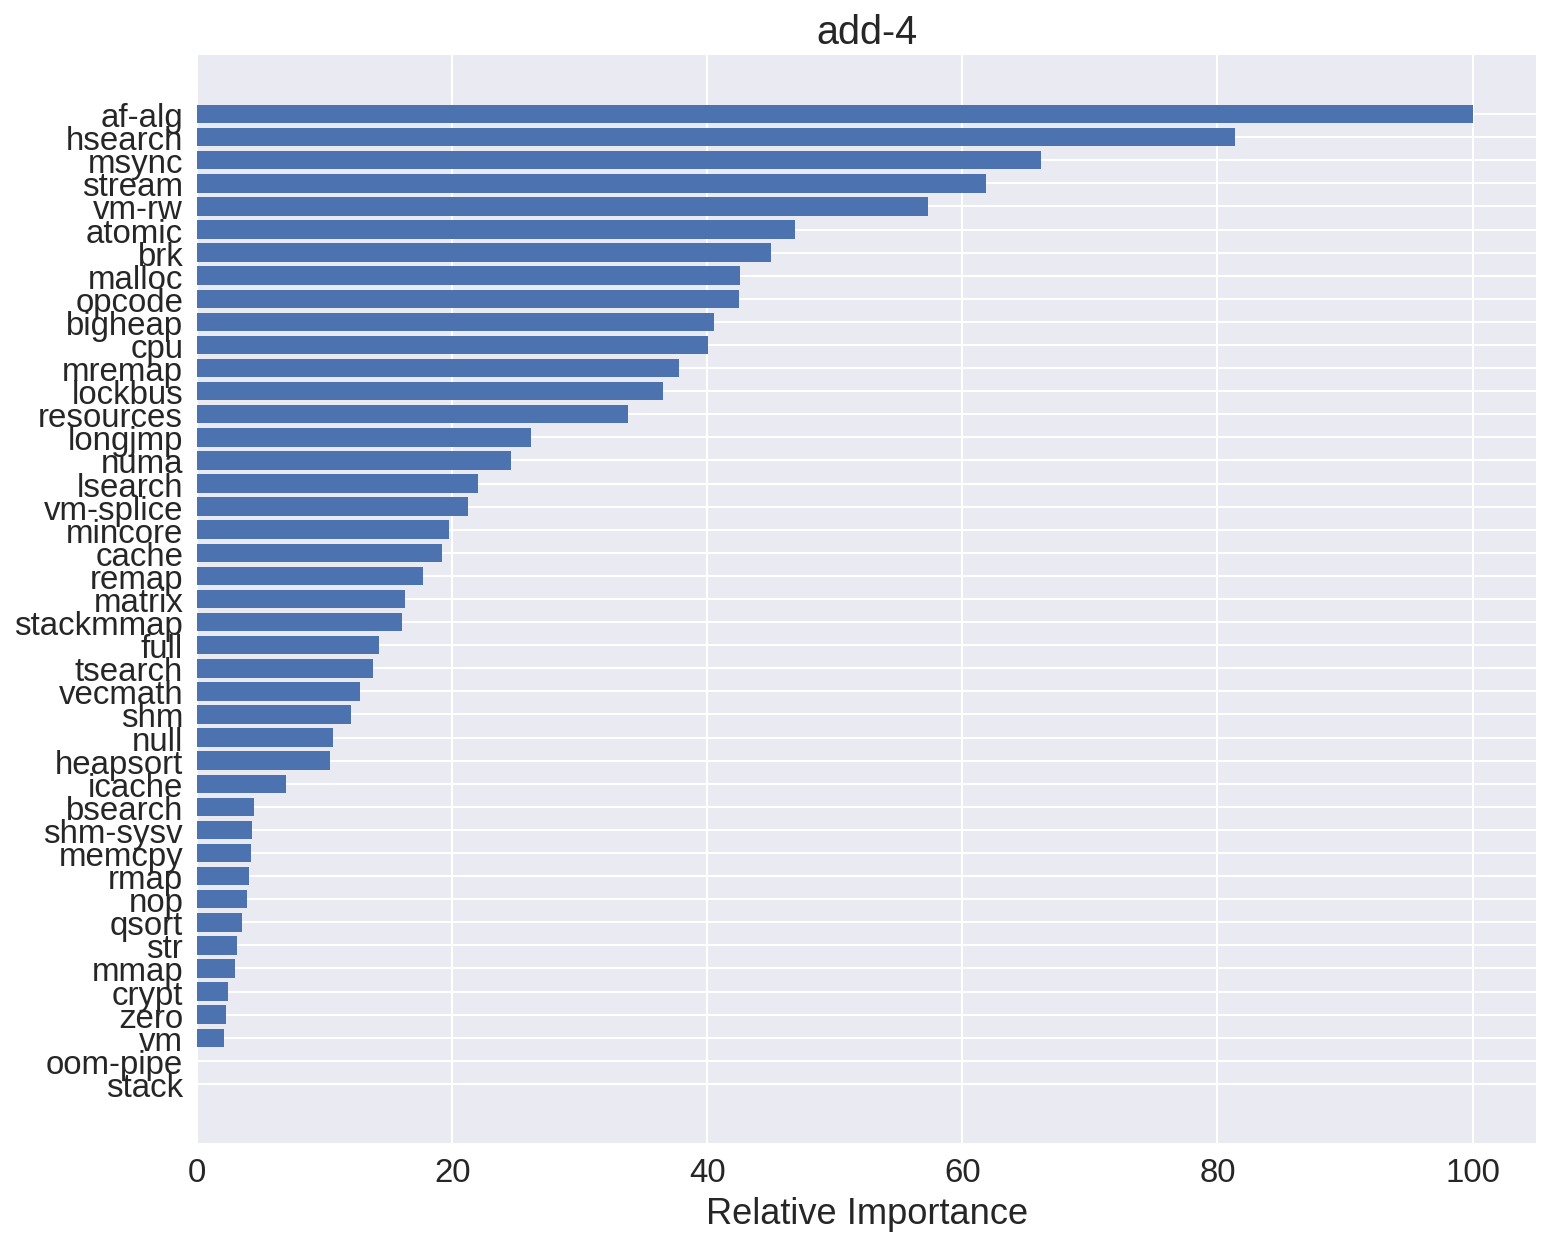

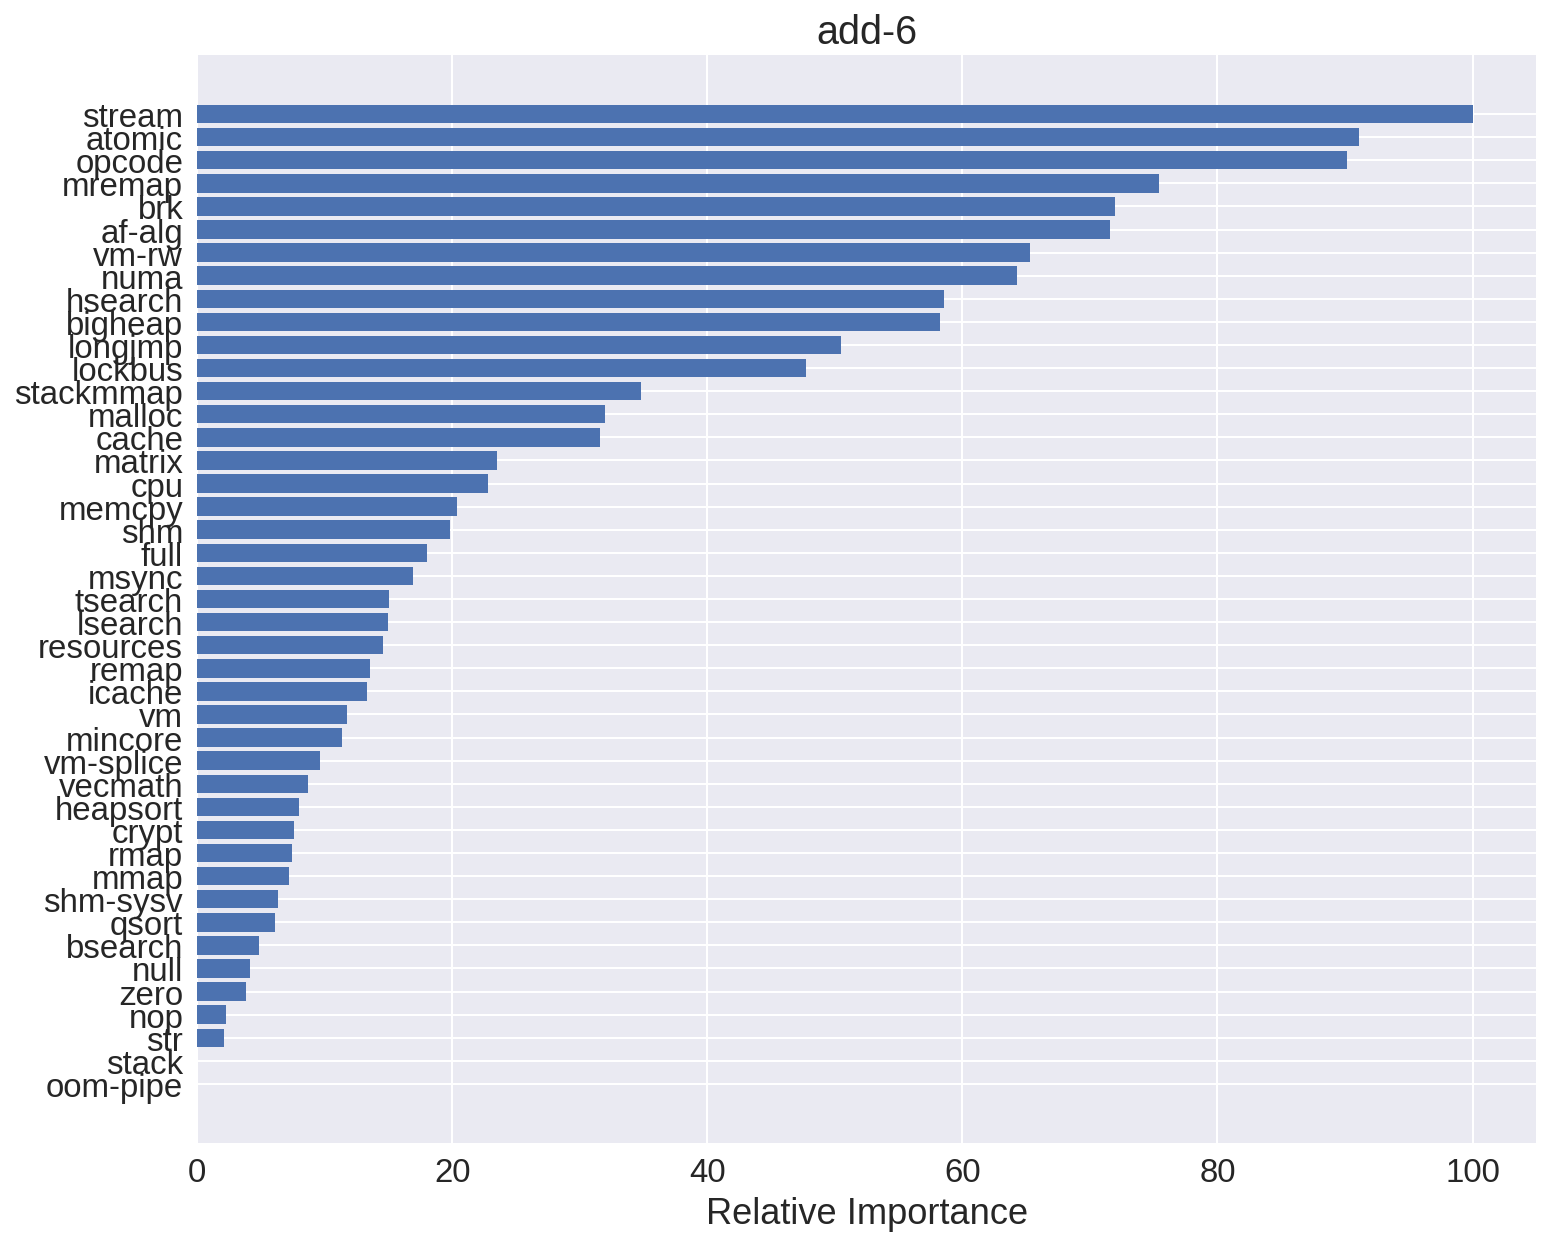

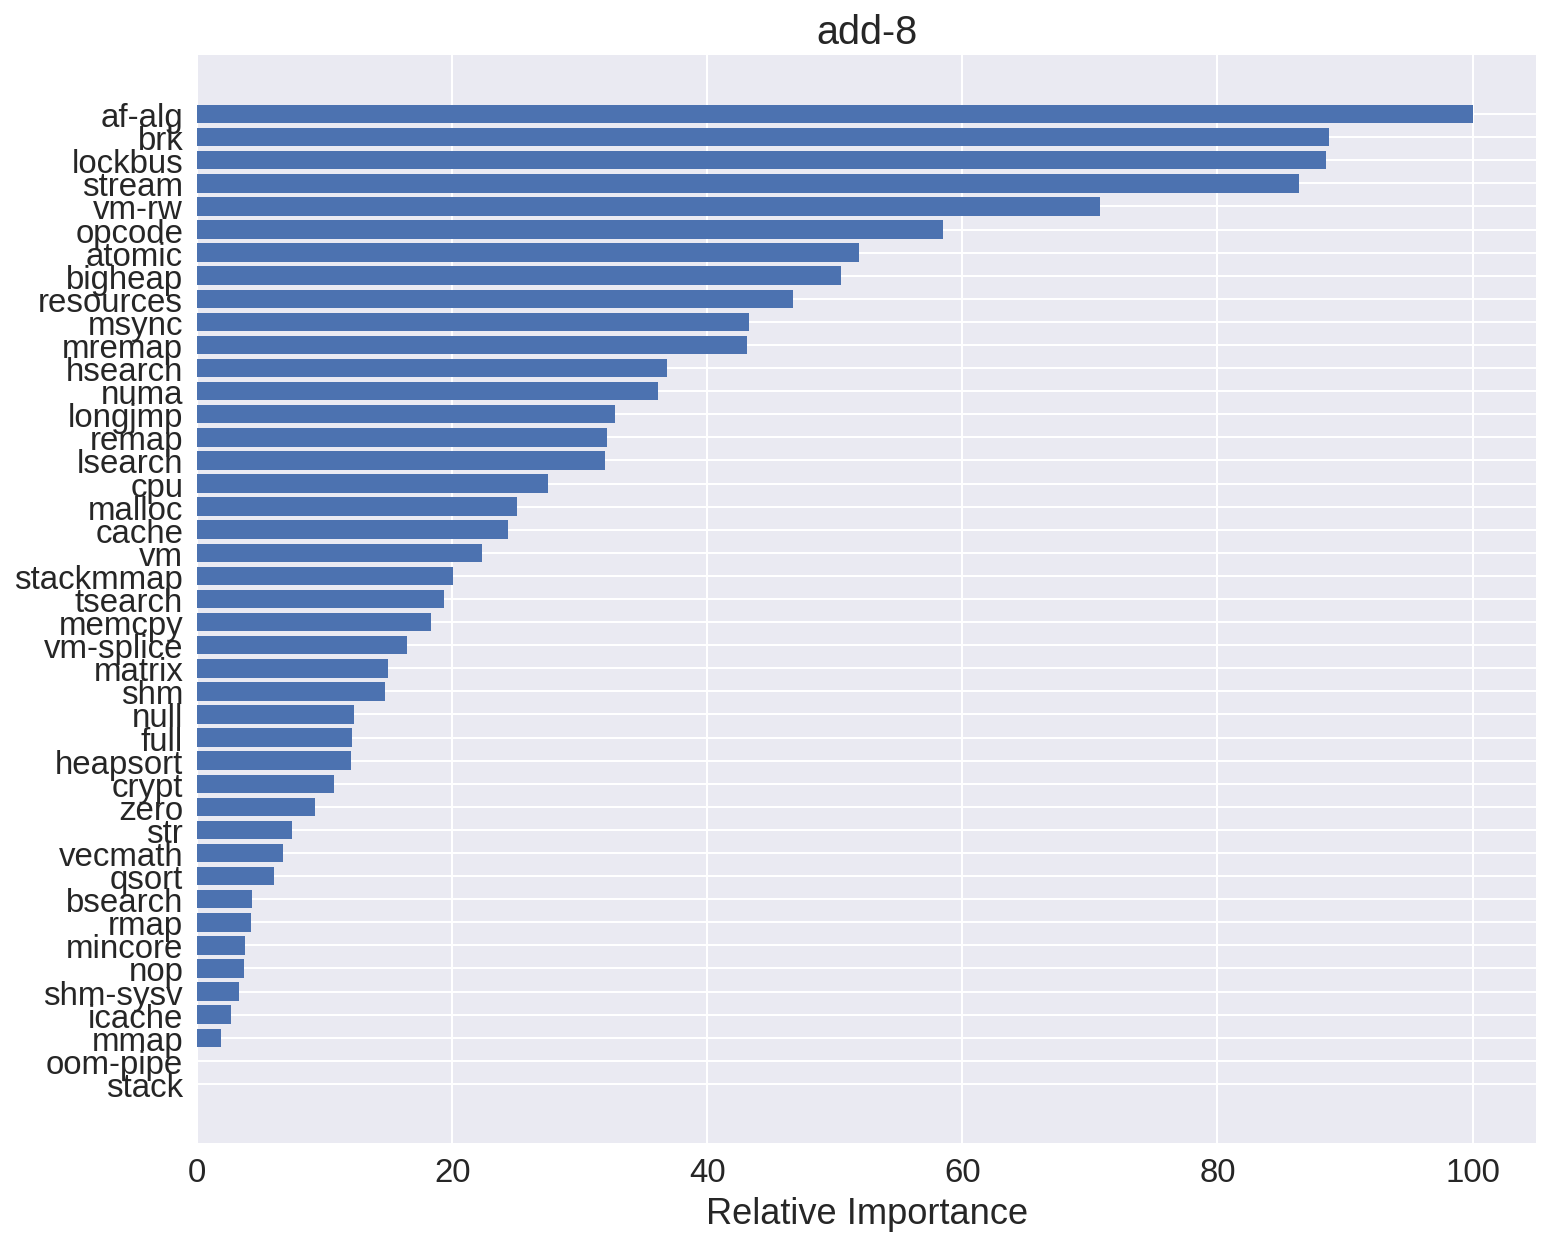

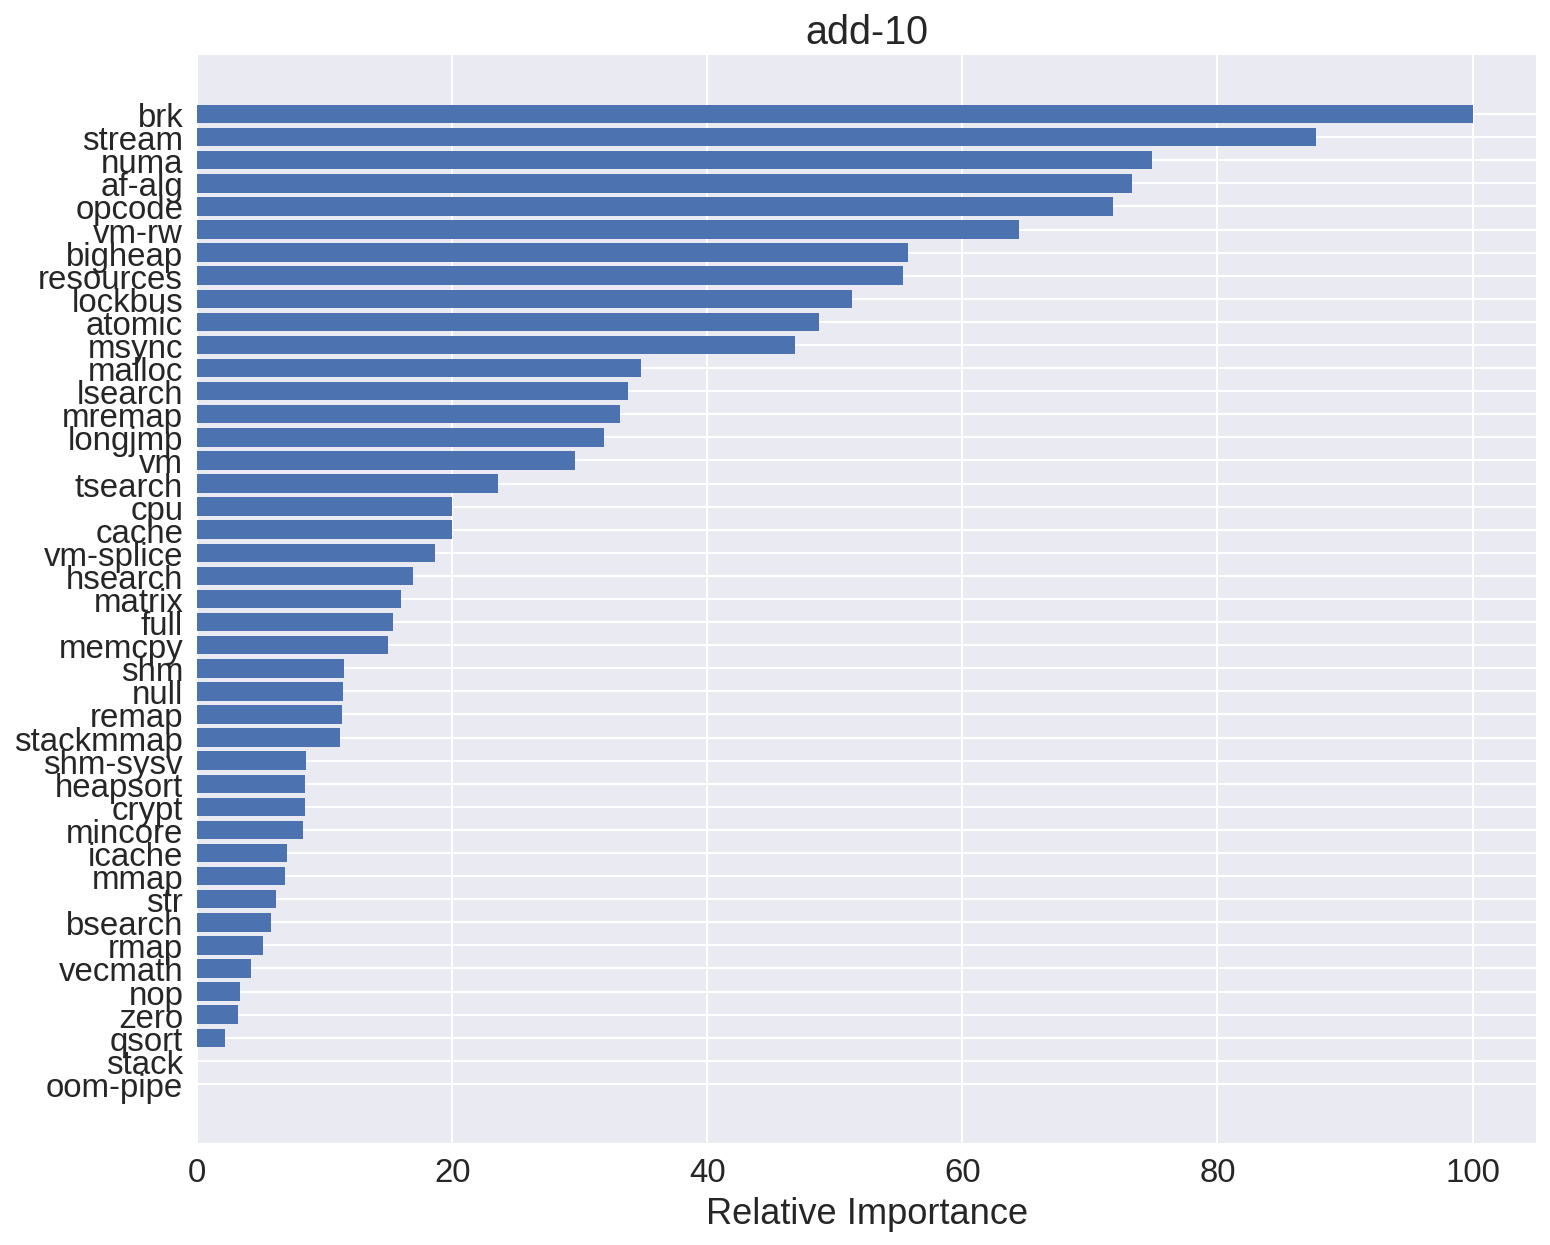

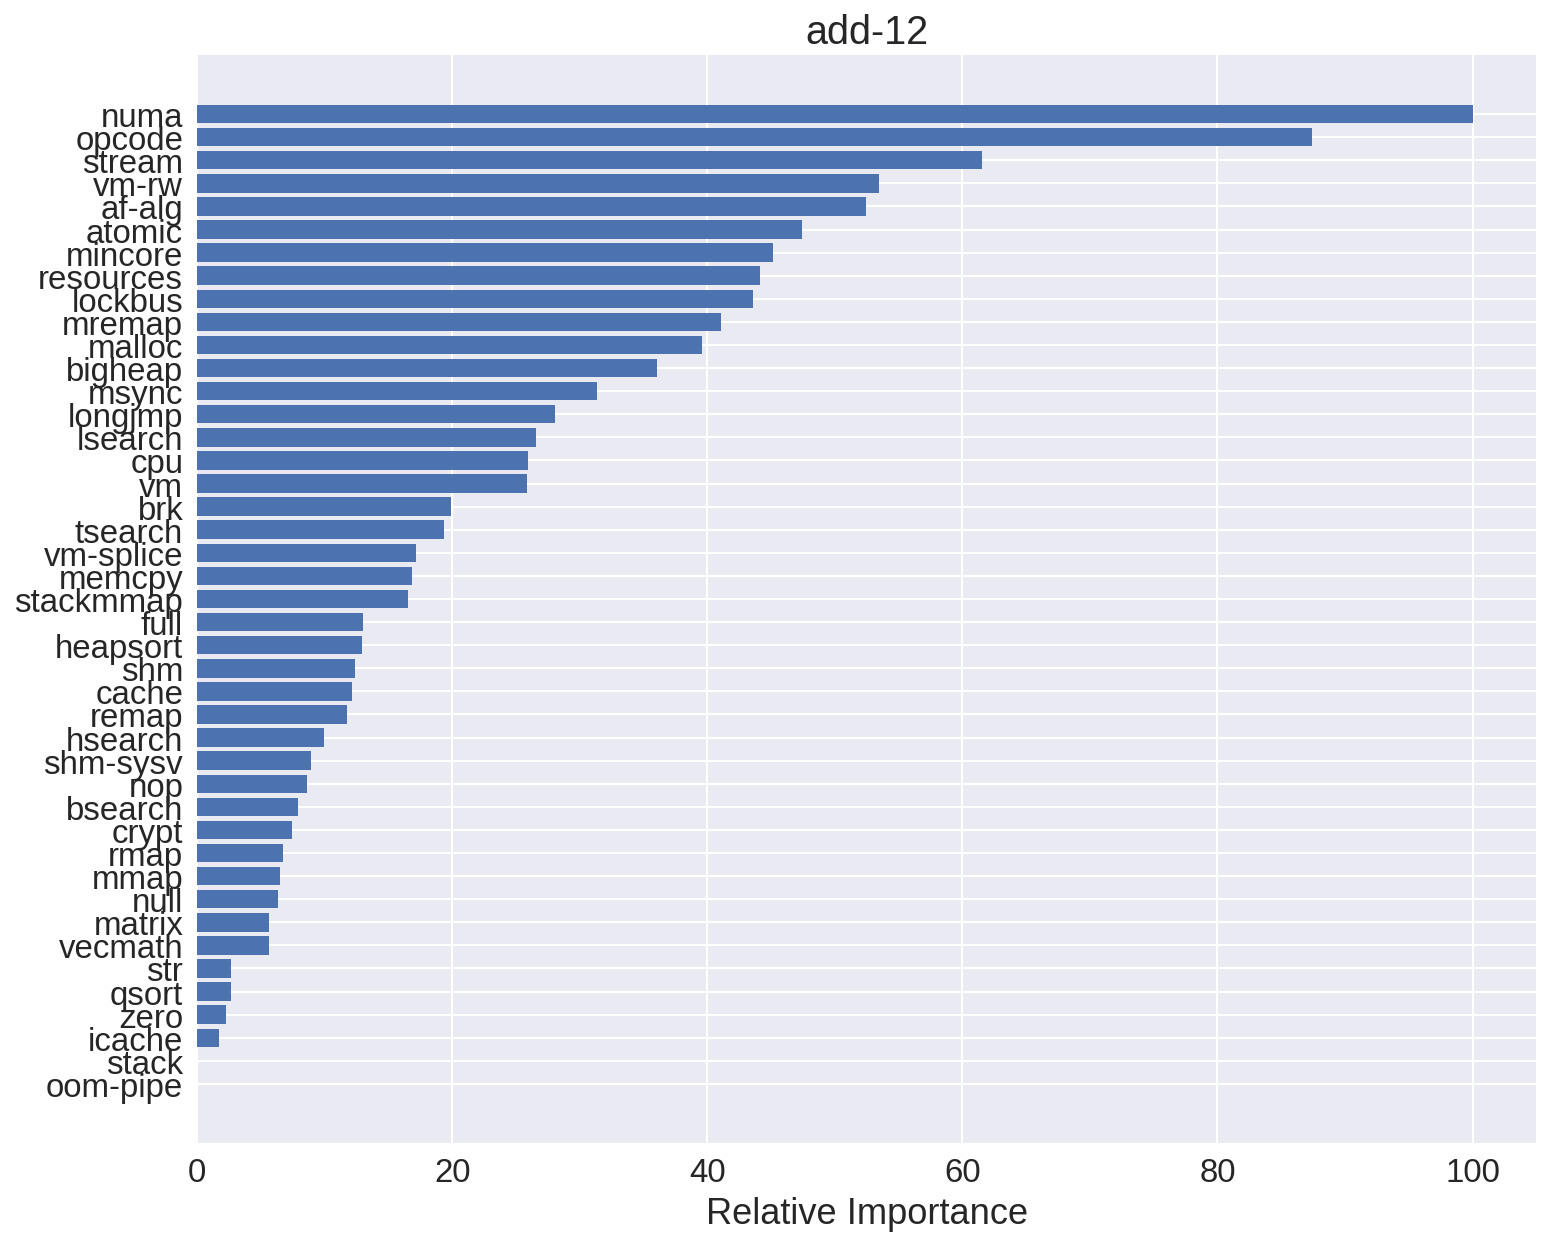

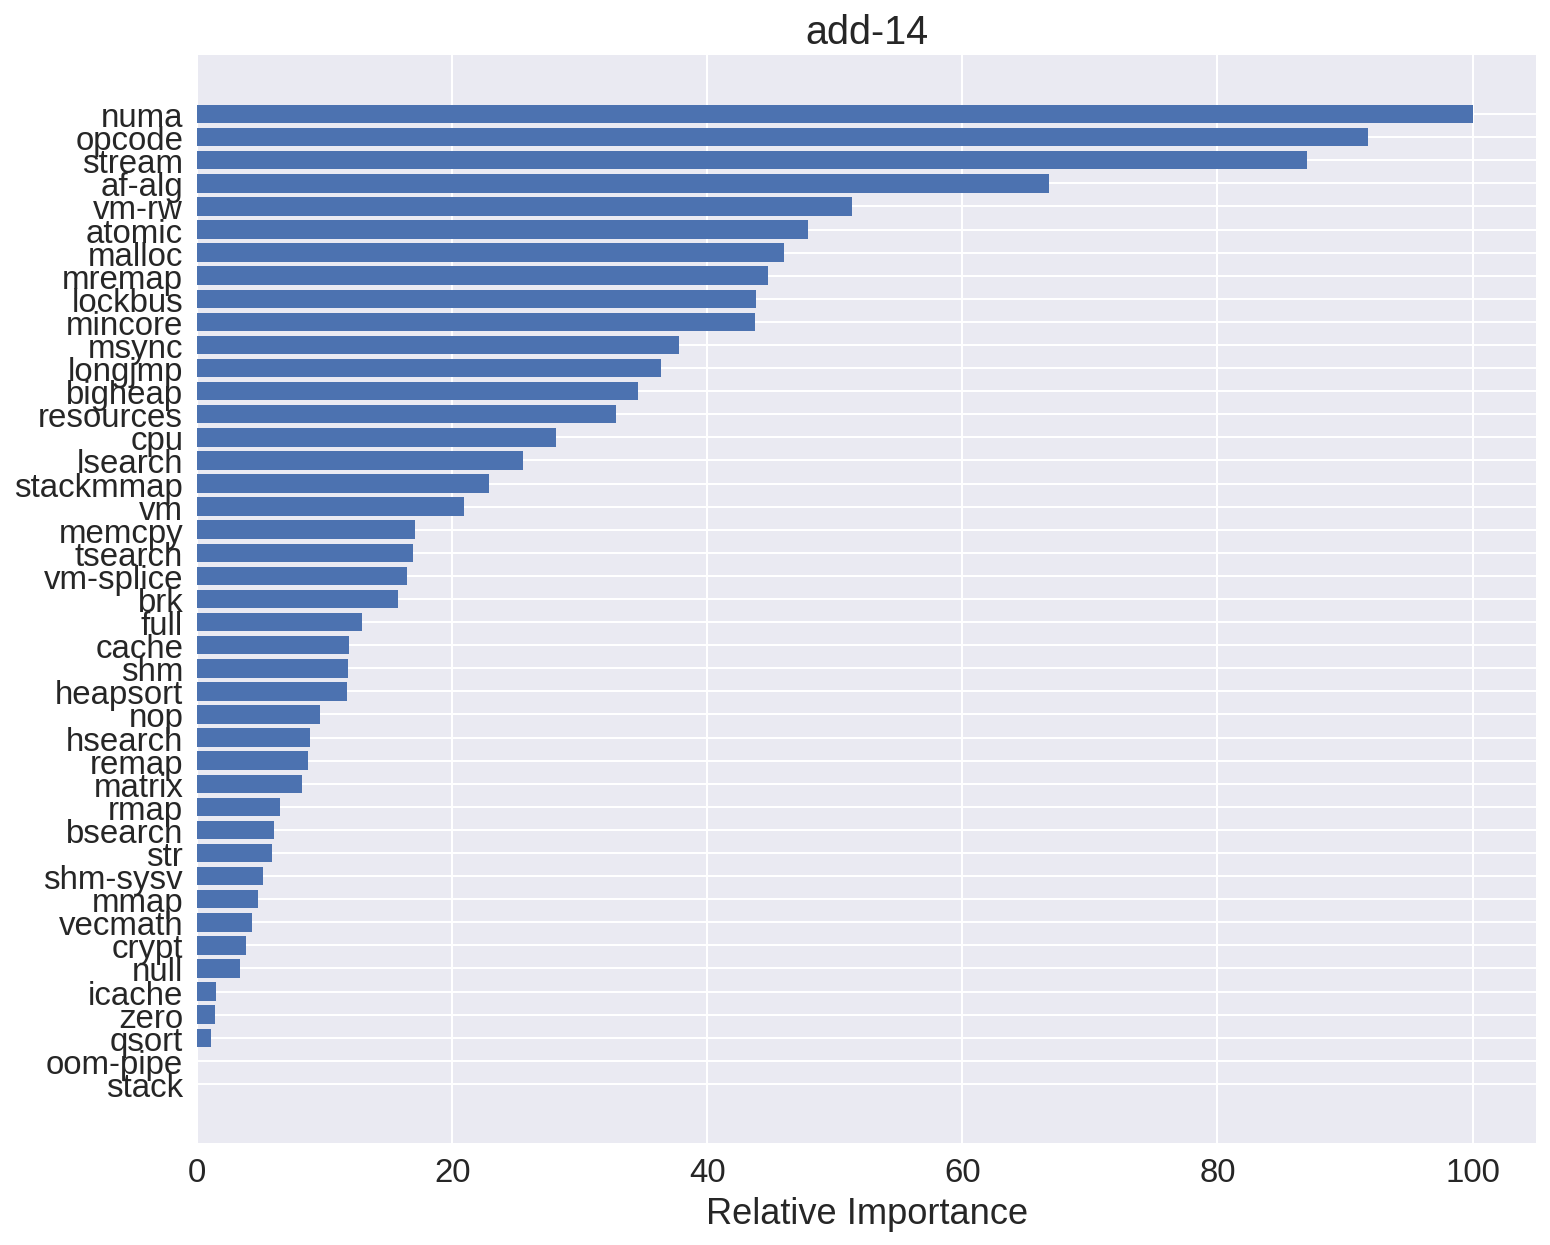

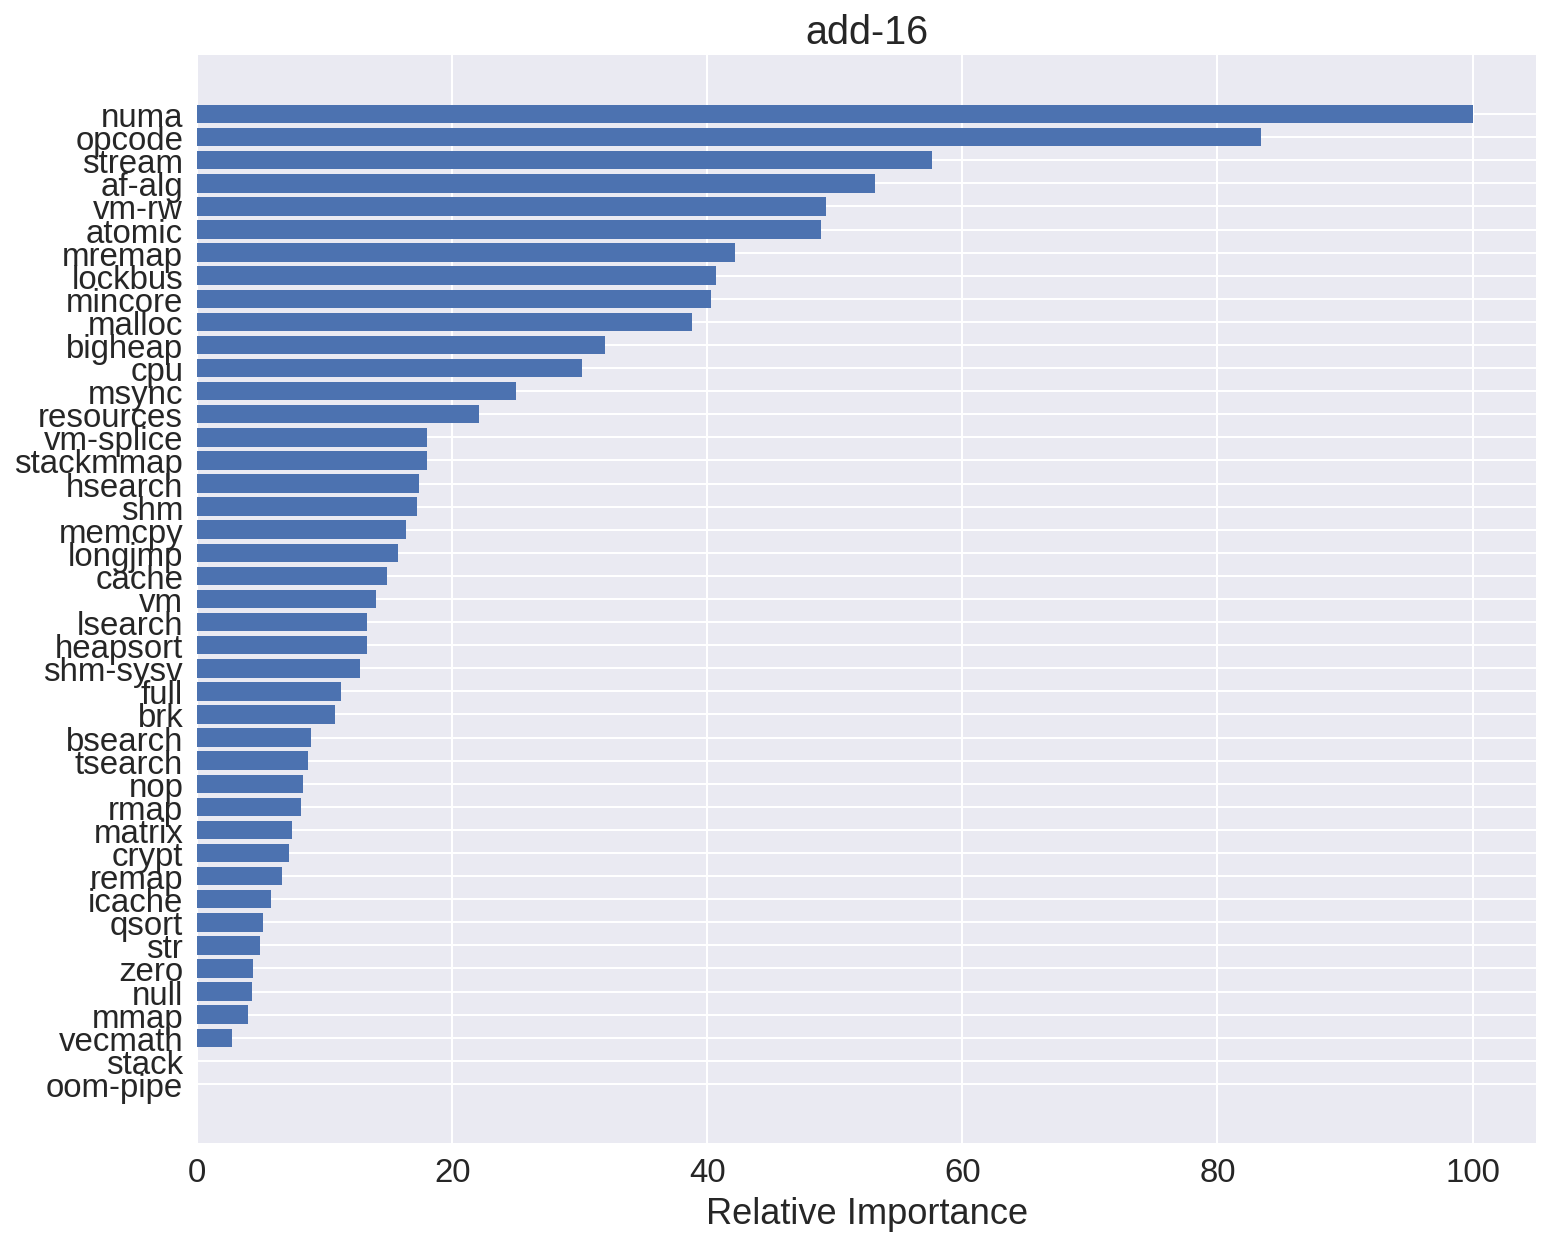

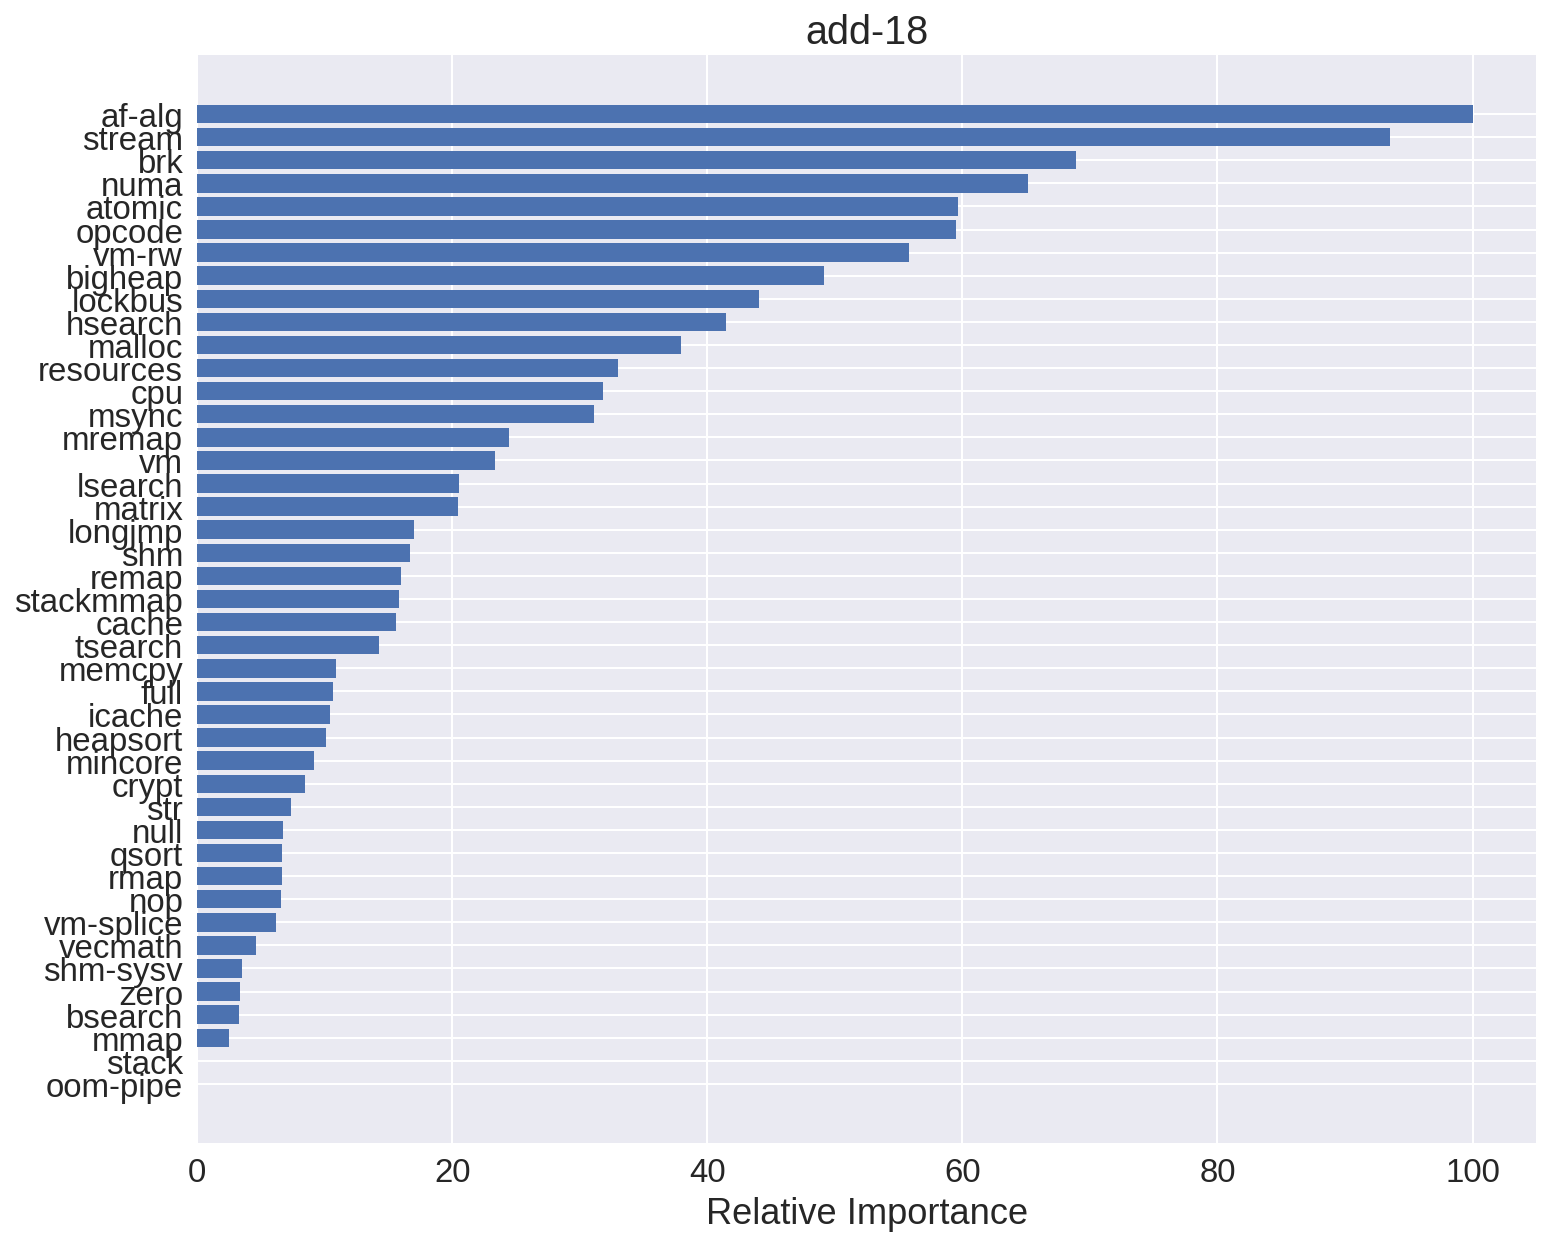

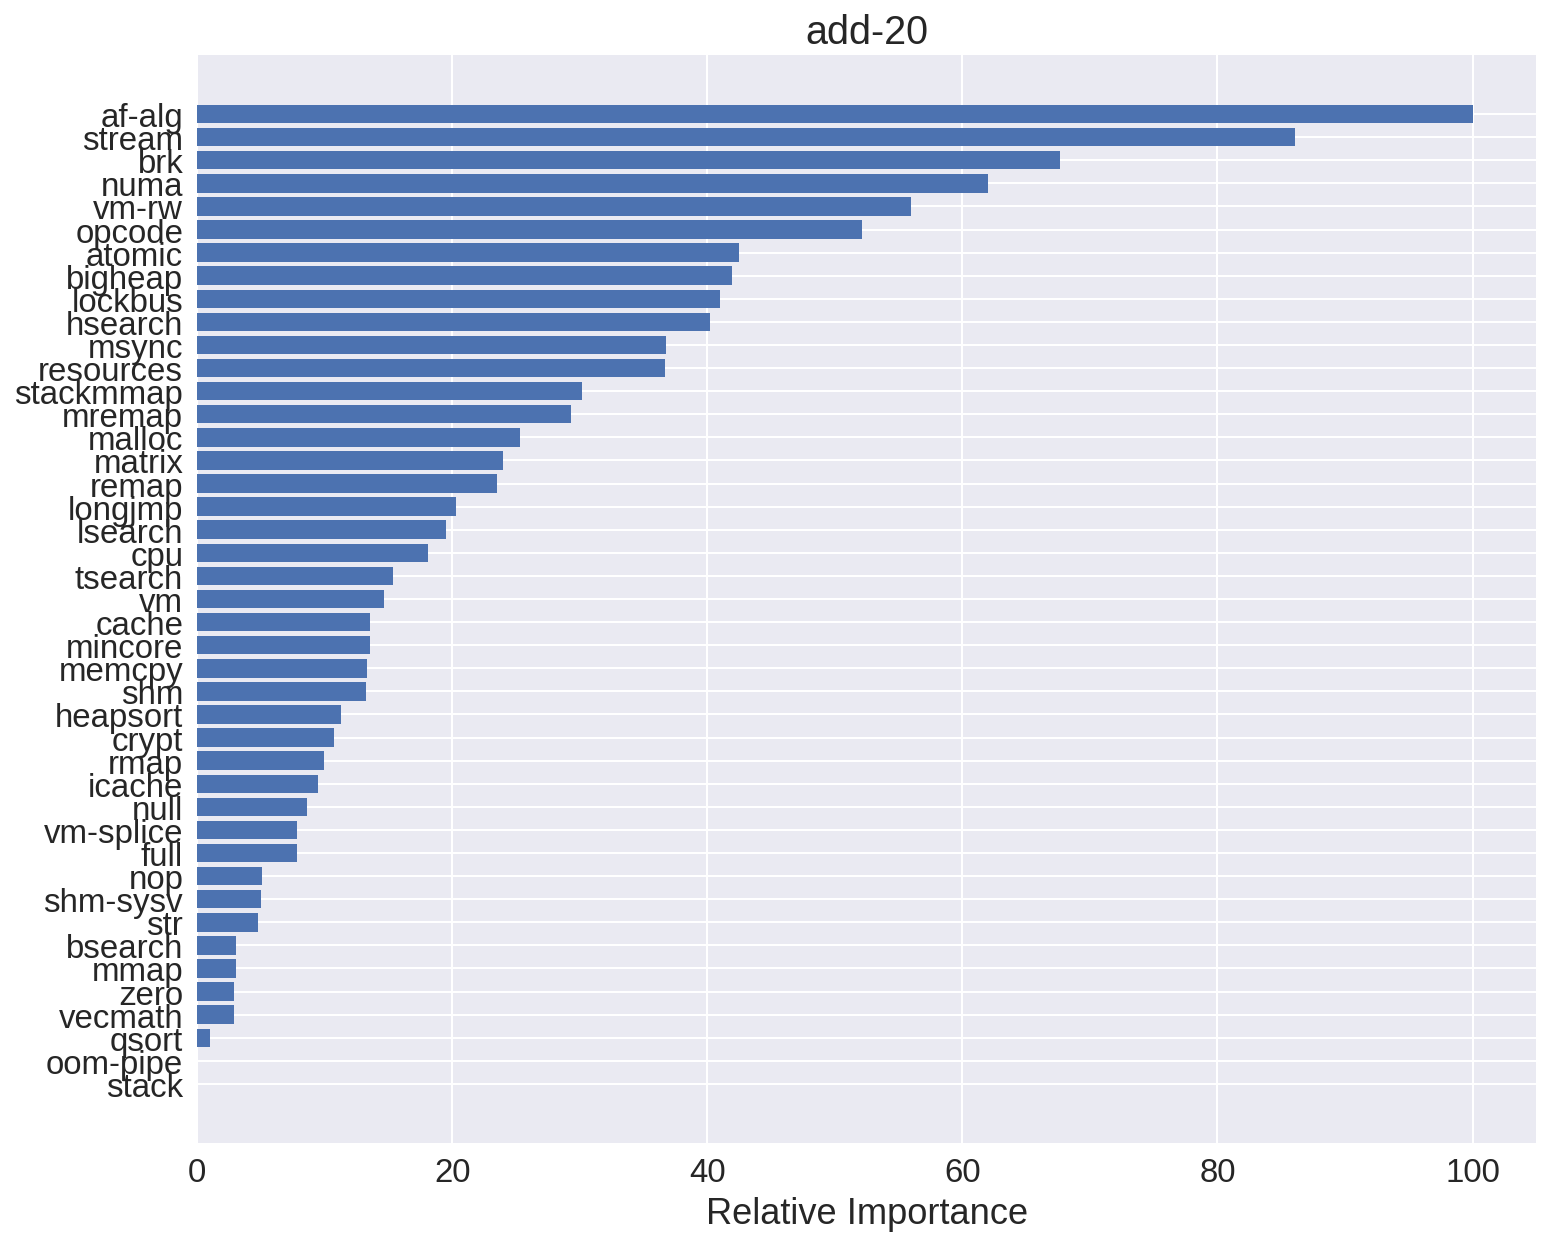

In [28]:
apps = ['ssca', 'hpccg', 'scikit-learn', 'redis-set', 'redis-get', 'mariadb-10.3.2-innodb_load', 'mariadb-10.3.2-memory_load', 'add-1', 'add-2', 'add-4', 'add-6', 'add-8', 'add-10', 'add-12', 'add-14', 'add-16', 'add-18', 'add-20']
plot_importance(get_features(df), stressors, apps)

# underfit

In [29]:
two_machines = df.sample(2)['machine'].values
underfit_data = get_features(subdf.query('machine in @two_machines'))

# show how many datapoints we have
len(underfit_data)

3

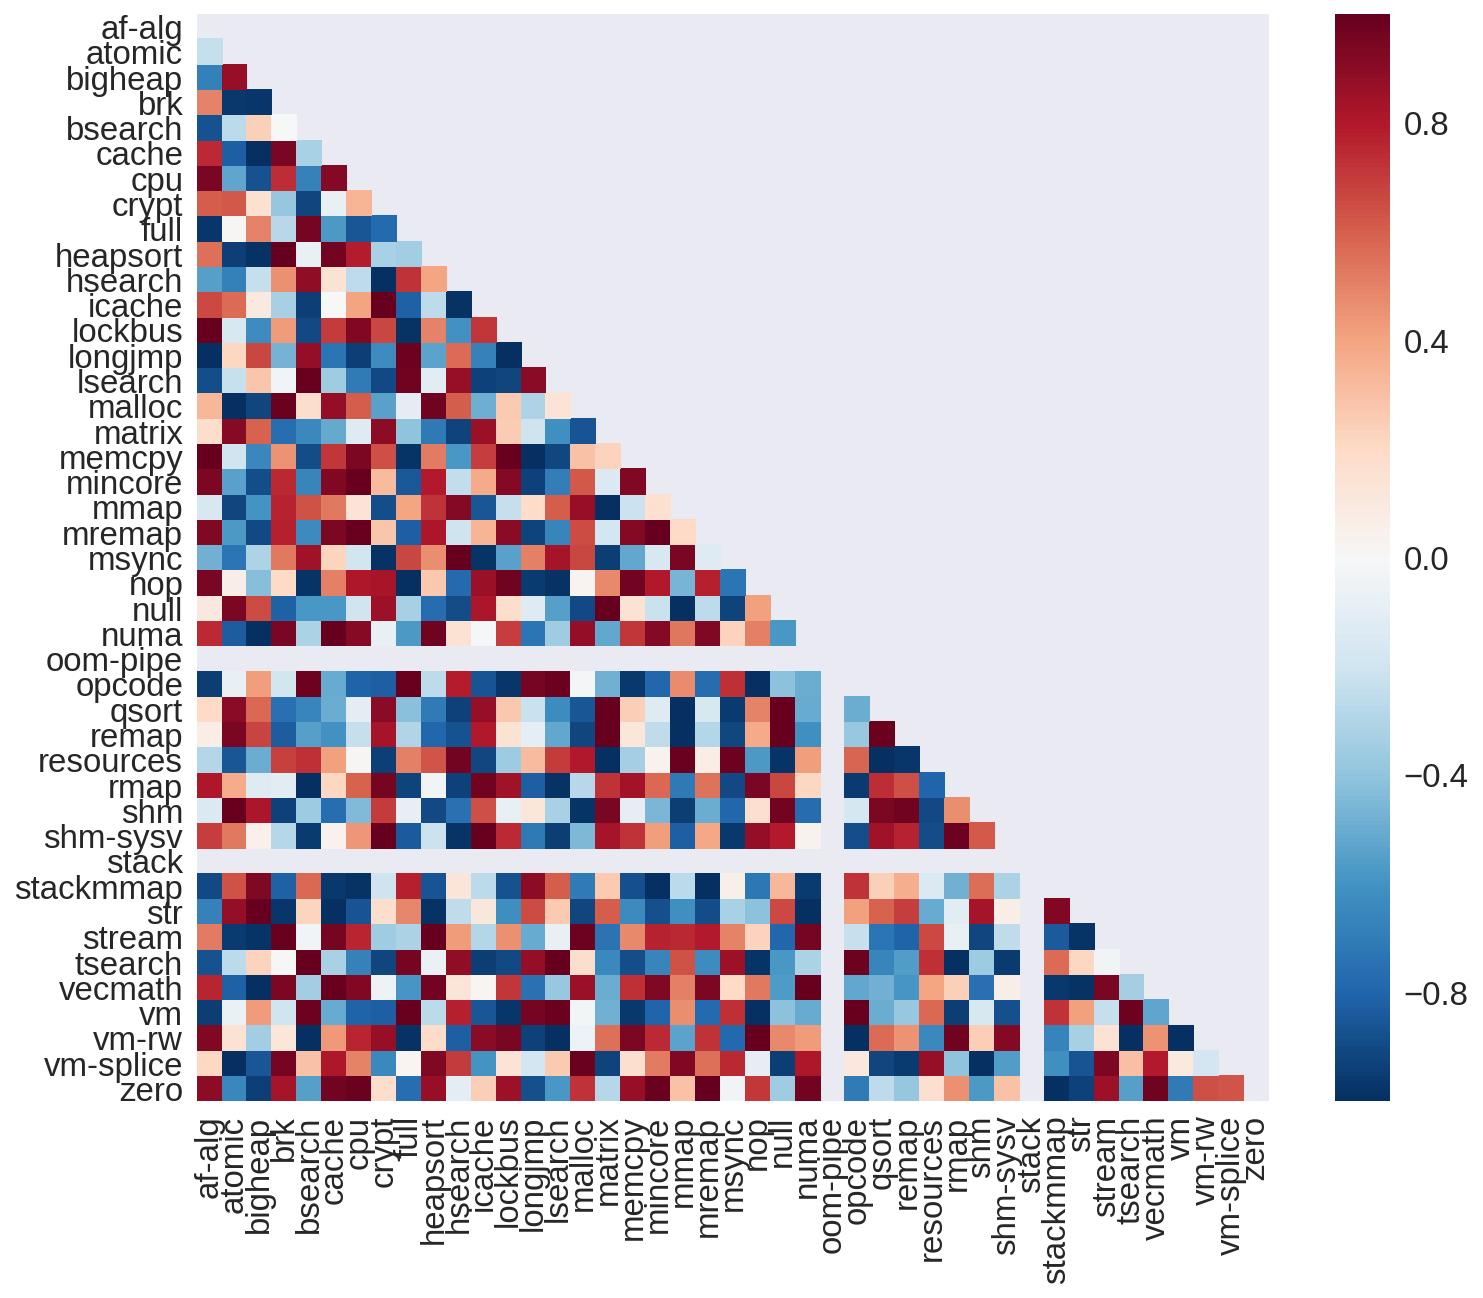

In [30]:
corr_matrix = plot_corrmatrix(underfit_data[stressors])
plt.savefig('figures/corrmatrix_underfit.png', dpi=300, bbox_inches='tight')

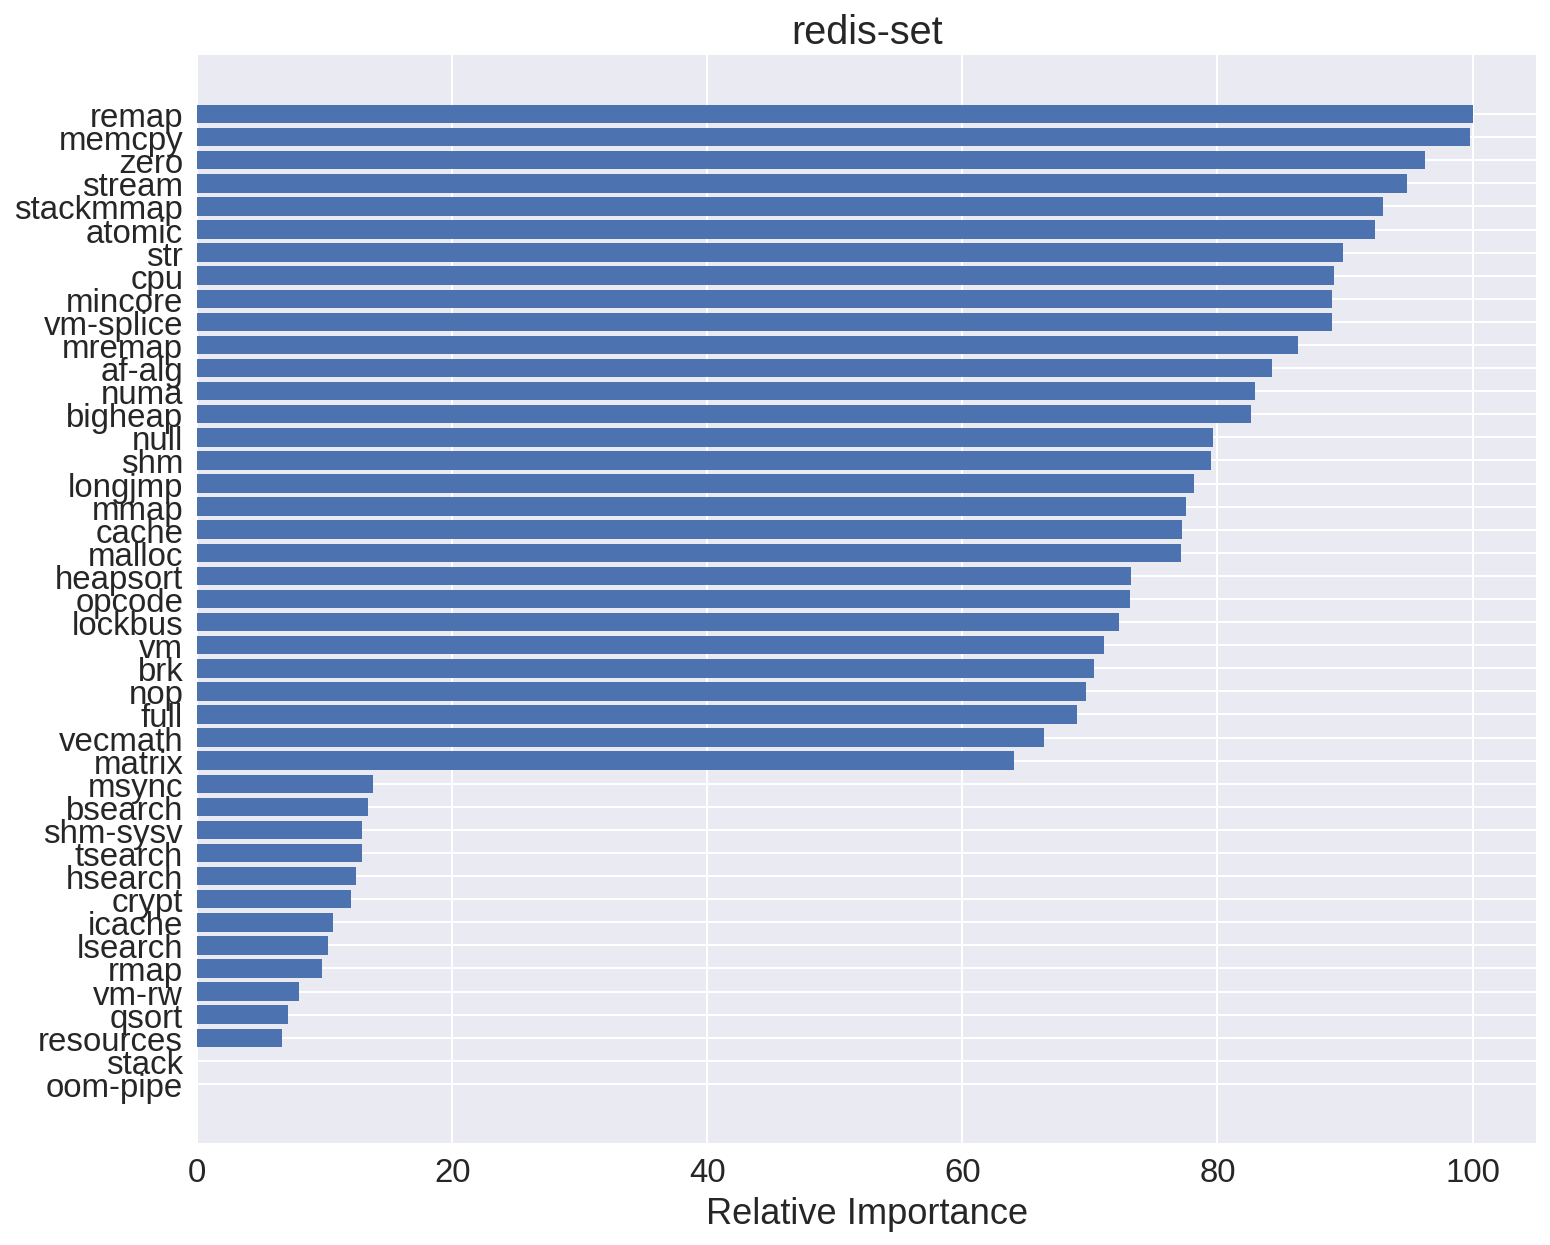

In [31]:
plot_importance(underfit_data, stressors, ['redis-set'], file_suffix='_underfit')

# stream-nadds behavior

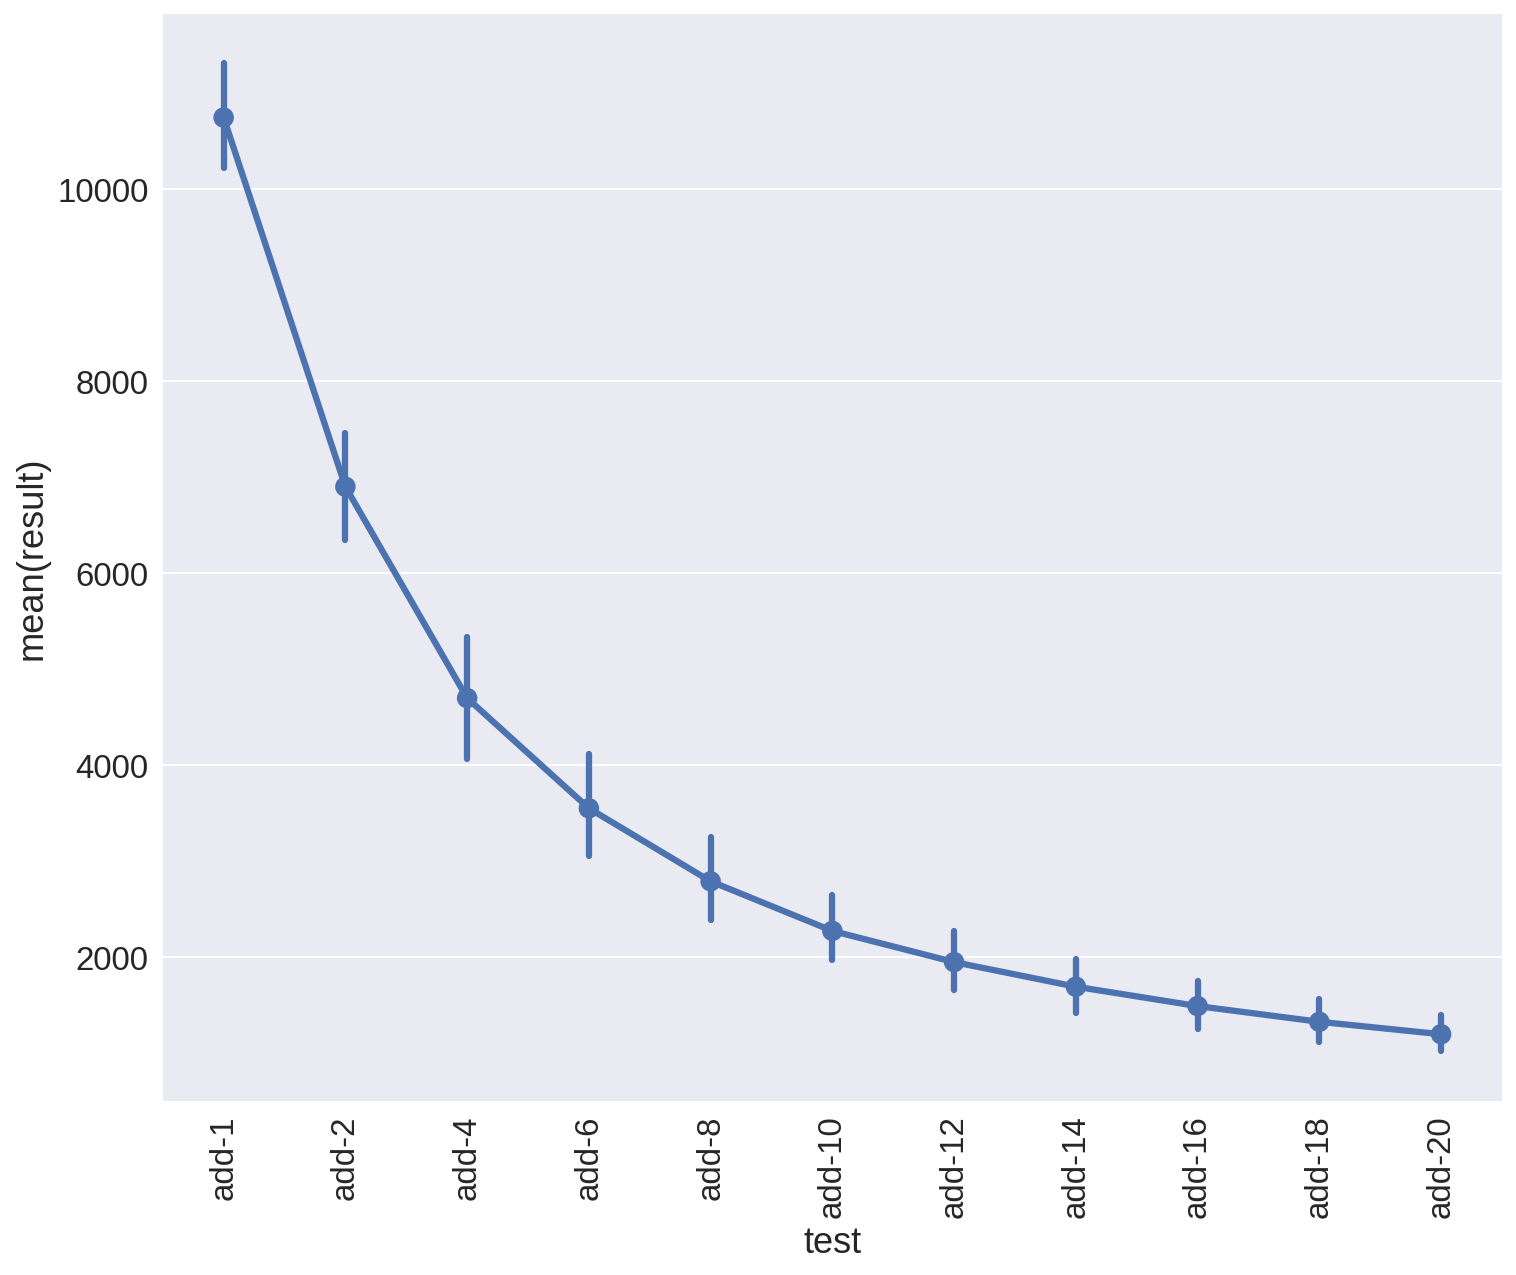

In [32]:
sns.pointplot(x='test', y='result', data=df[df['test'].str.startswith('add')].query('benchmark == "stream"'), order=['add-1'] + ['add-{}'.format(i) for i in range(2,22,2)])
plt.xticks(rotation=90)
plt.savefig('figures/stream-nadds-behavior.png', dpi=300, bbox_inches='tight')

# regressions

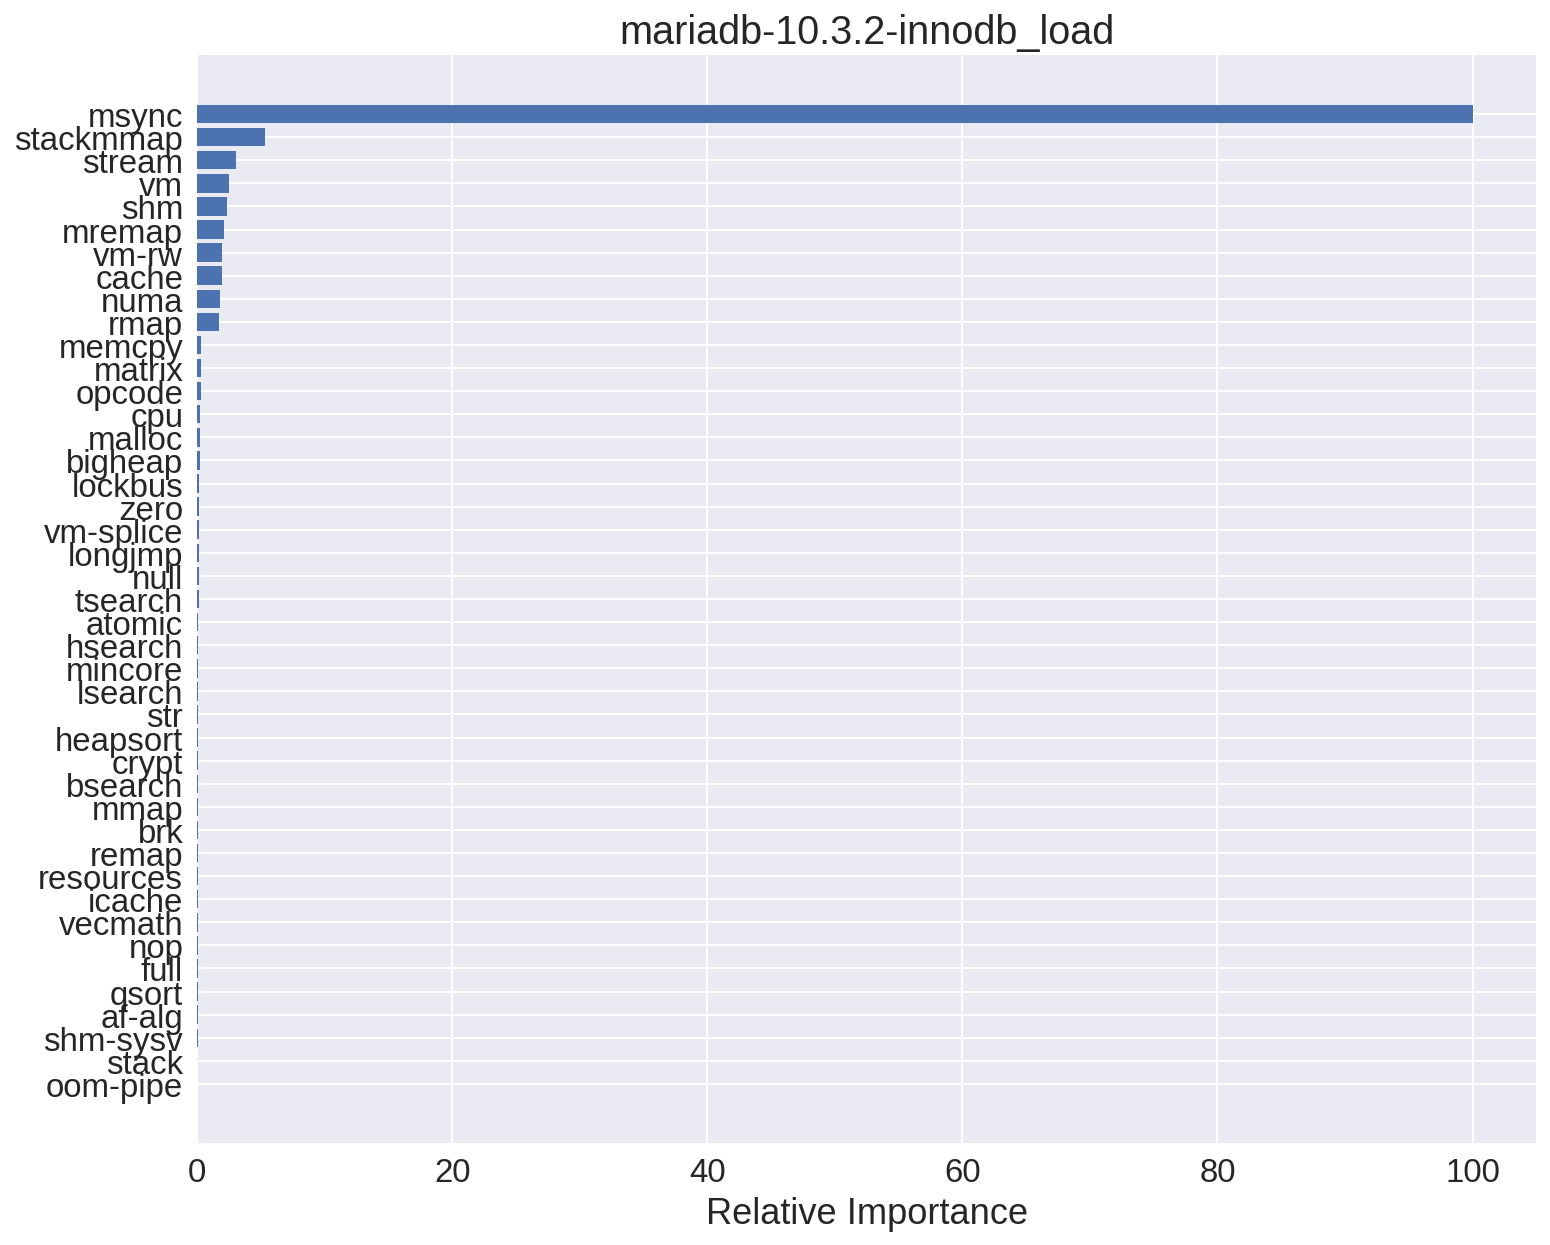

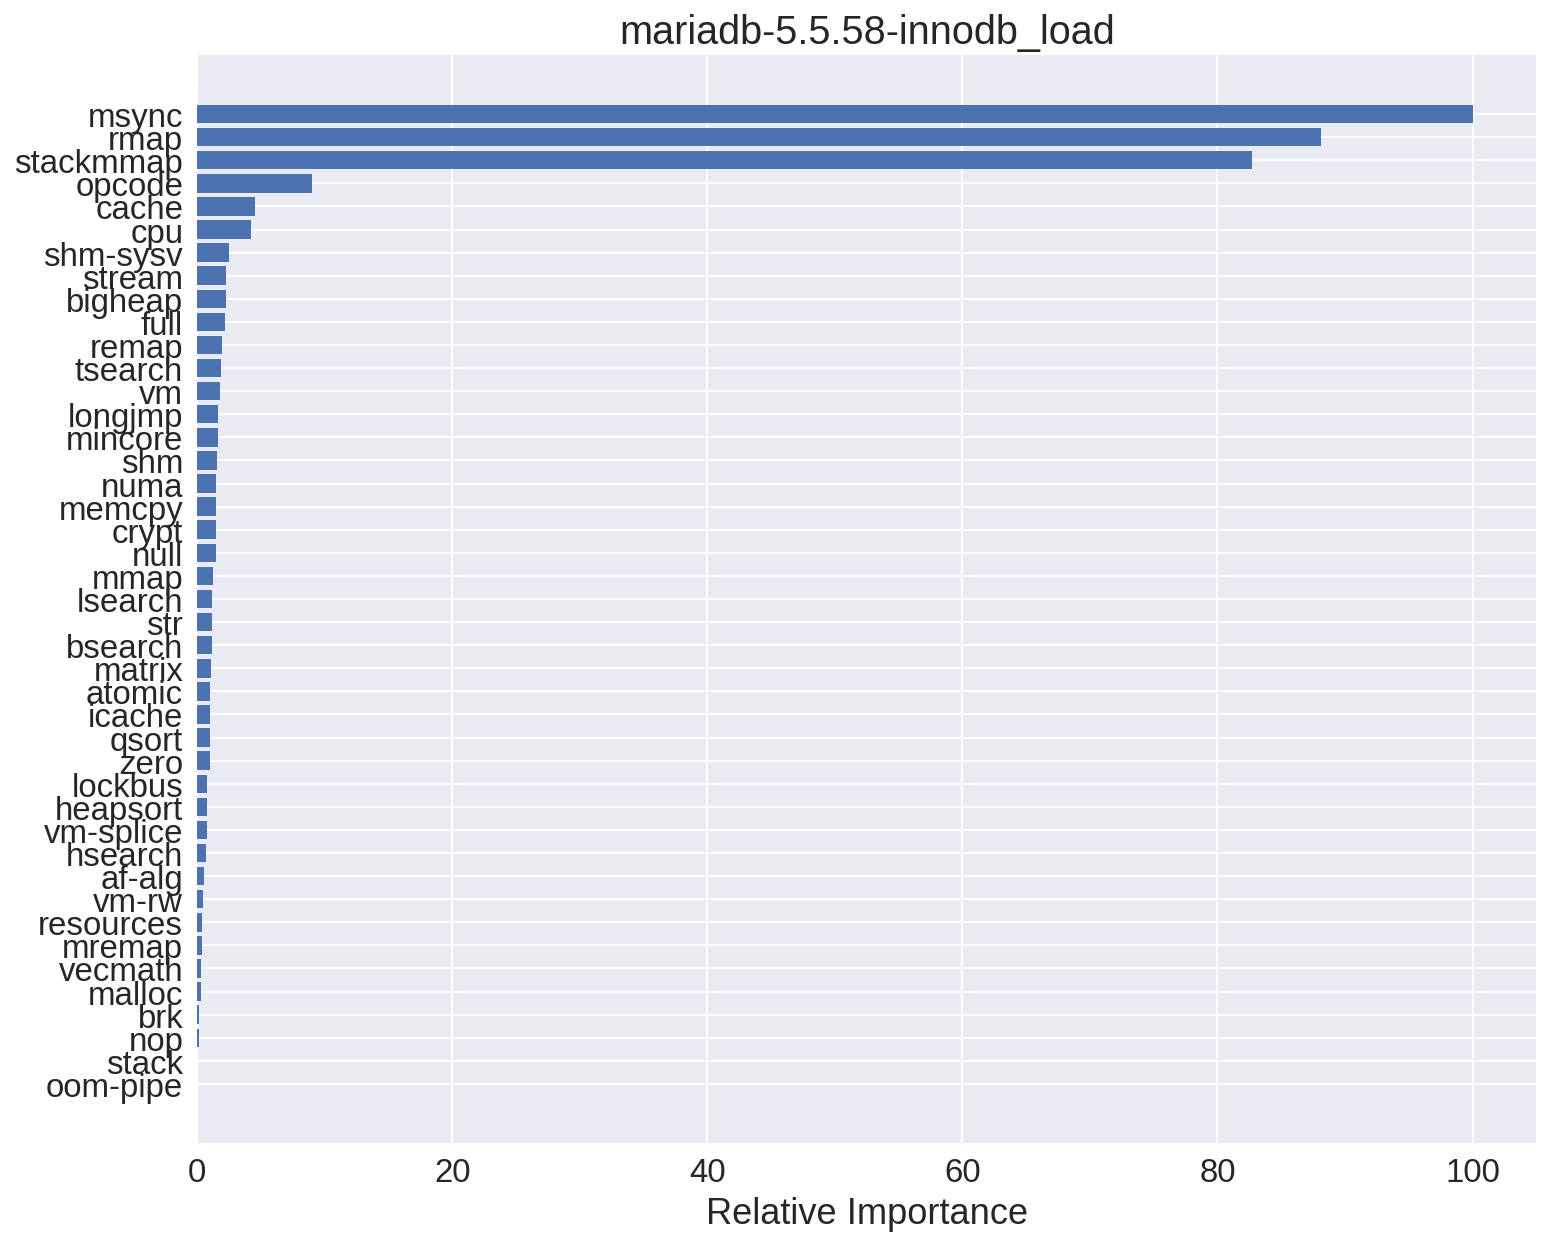

In [33]:
apps = ['mariadb-10.3.2-innodb_load', 'mariadb-5.5.58-innodb_load']
plot_importance(get_features(df), stressors, apps)